<div class="alert alert-block alert-success" style="font-size: 20px"> <b>Example of experiments with different metaheuristics for optimisation of continuous problems</b></div>

<div class="alert alert-block alert-success" style="font-size: 16px"> Specification of the parameters used in the simulation</div>

In [1]:
from aux_functions import *

In [2]:
problem_dim = 50
problem = "Sphere"

tw_size=10
num_iter = 500
num_executions = 5
population_size = 100
algorithms = ["GPSO", "LPSO", "ABC", "CSO", "DE", "GA", "PSOPS", "MeABC"]

In [3]:
# Directory to the simulation output files
output_dir = "C:/Users/cj413/Documents/GitHub/INs/results"
# Directury to save the results of this notebook
processed_results_dir = output_dir + "/processed/continuous"

if not os.path.isdir(processed_results_dir):
    os.makedirs(processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Loading the network files</div>

In [4]:
networks_per_tw_dict = load_alg_network(algorithms, population_size, num_iter, num_executions, problem, 
                                        problem_dim, tw_size, output_dir)
networks_per_tw_dict.keys()

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

dict_keys(['GPSO', 'LPSO', 'ABC', 'CSO', 'DE', 'GA', 'PSOPS', 'MeABC'])

<div class="alert alert-block alert-success" style="font-size: 16px"> Exporting and ploting some examples of network</div>

  0%|          | 0/8 [00:00<?, ?it/s]

GPSO


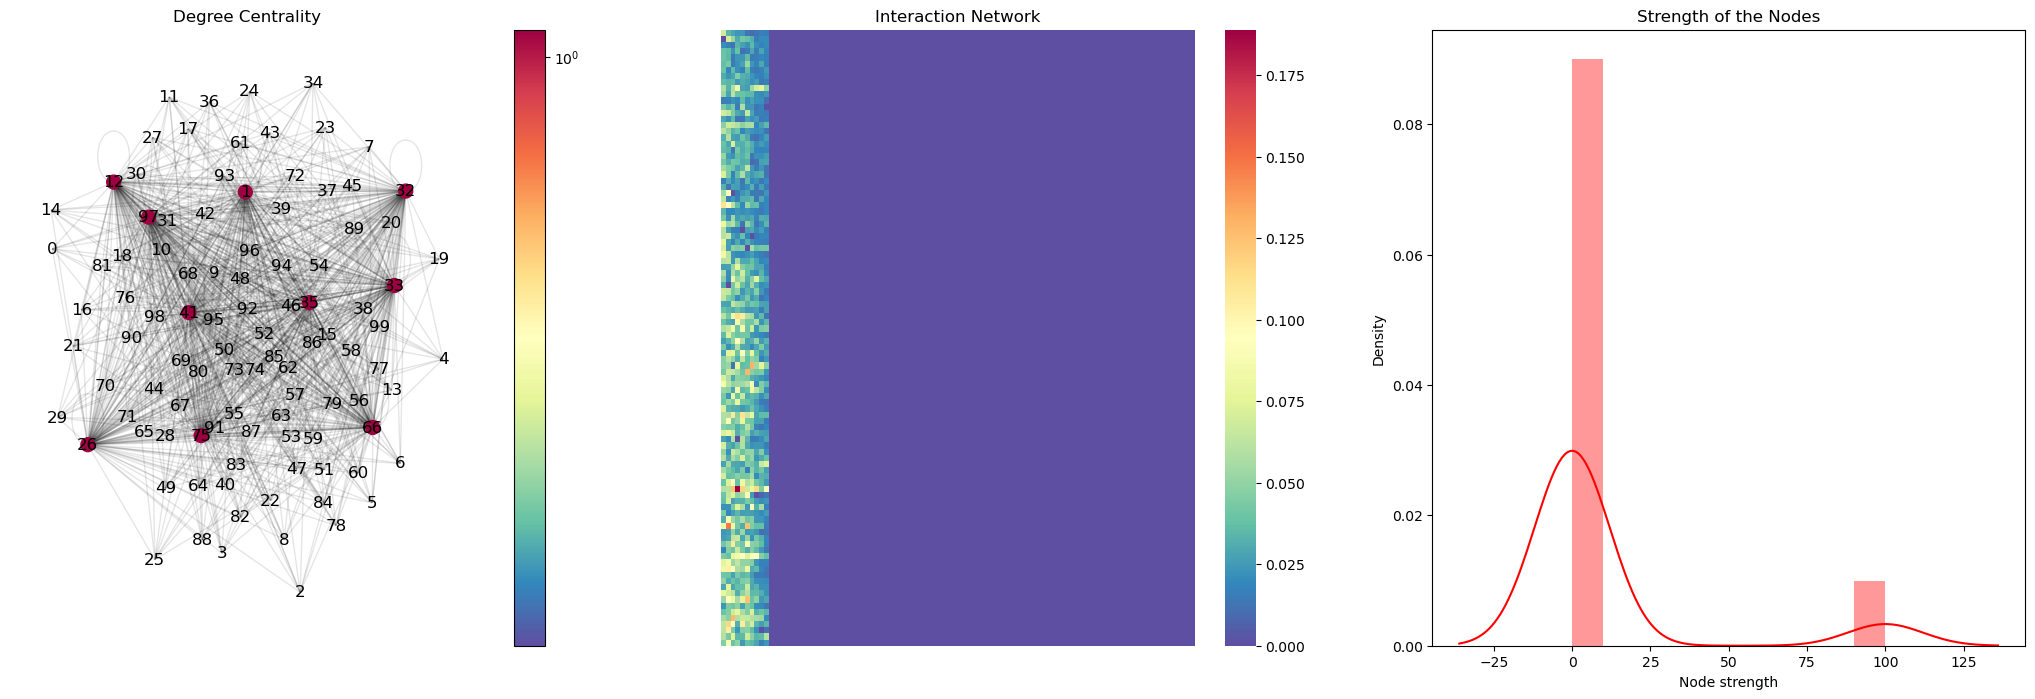

LPSO


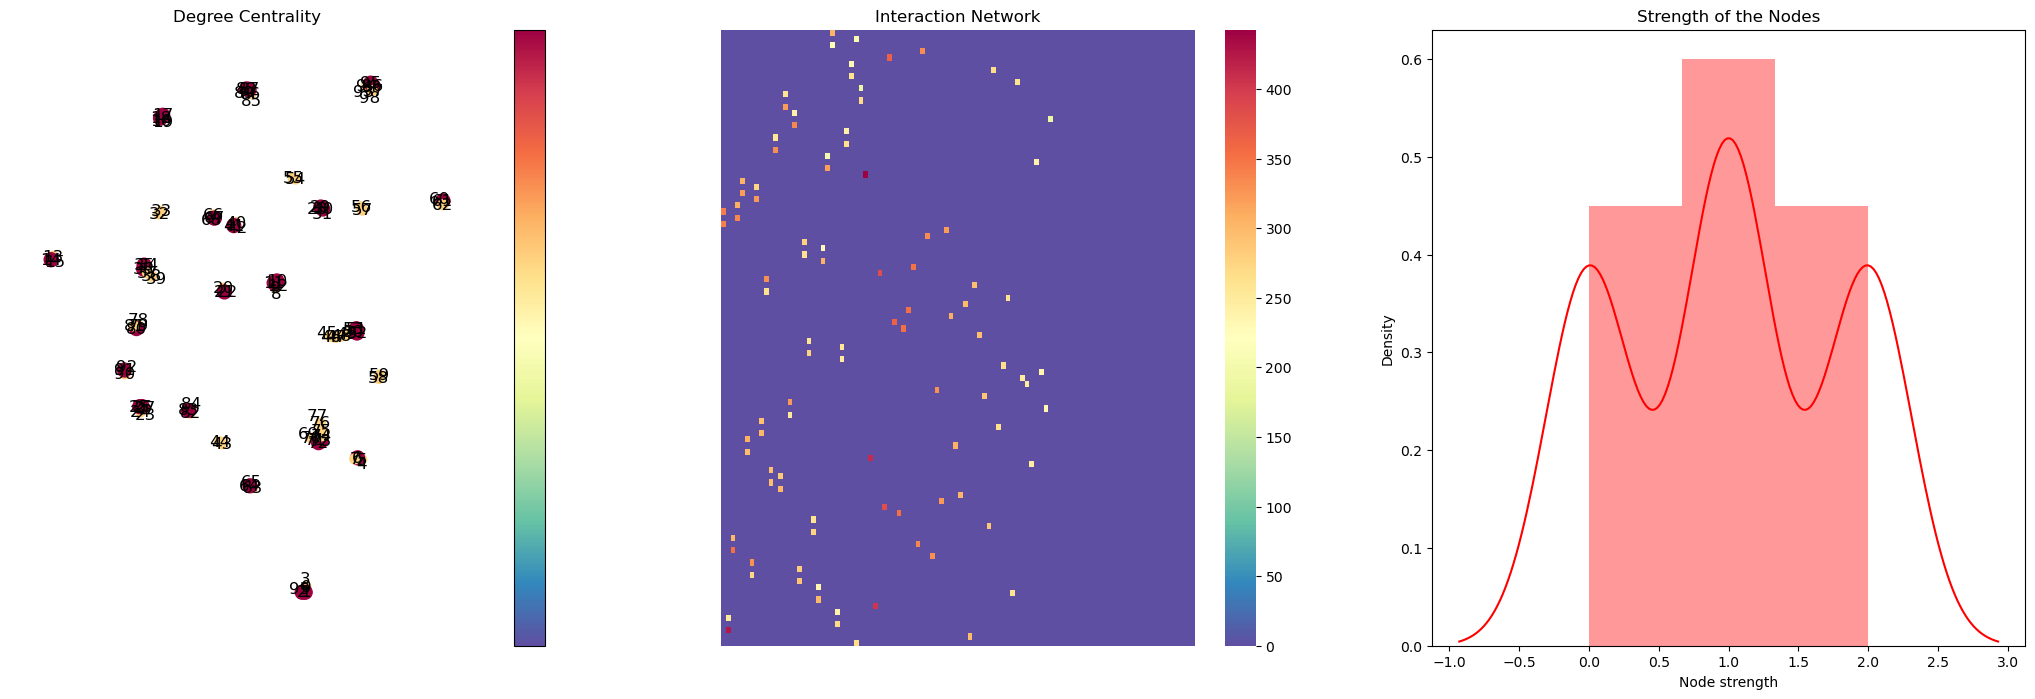

ABC


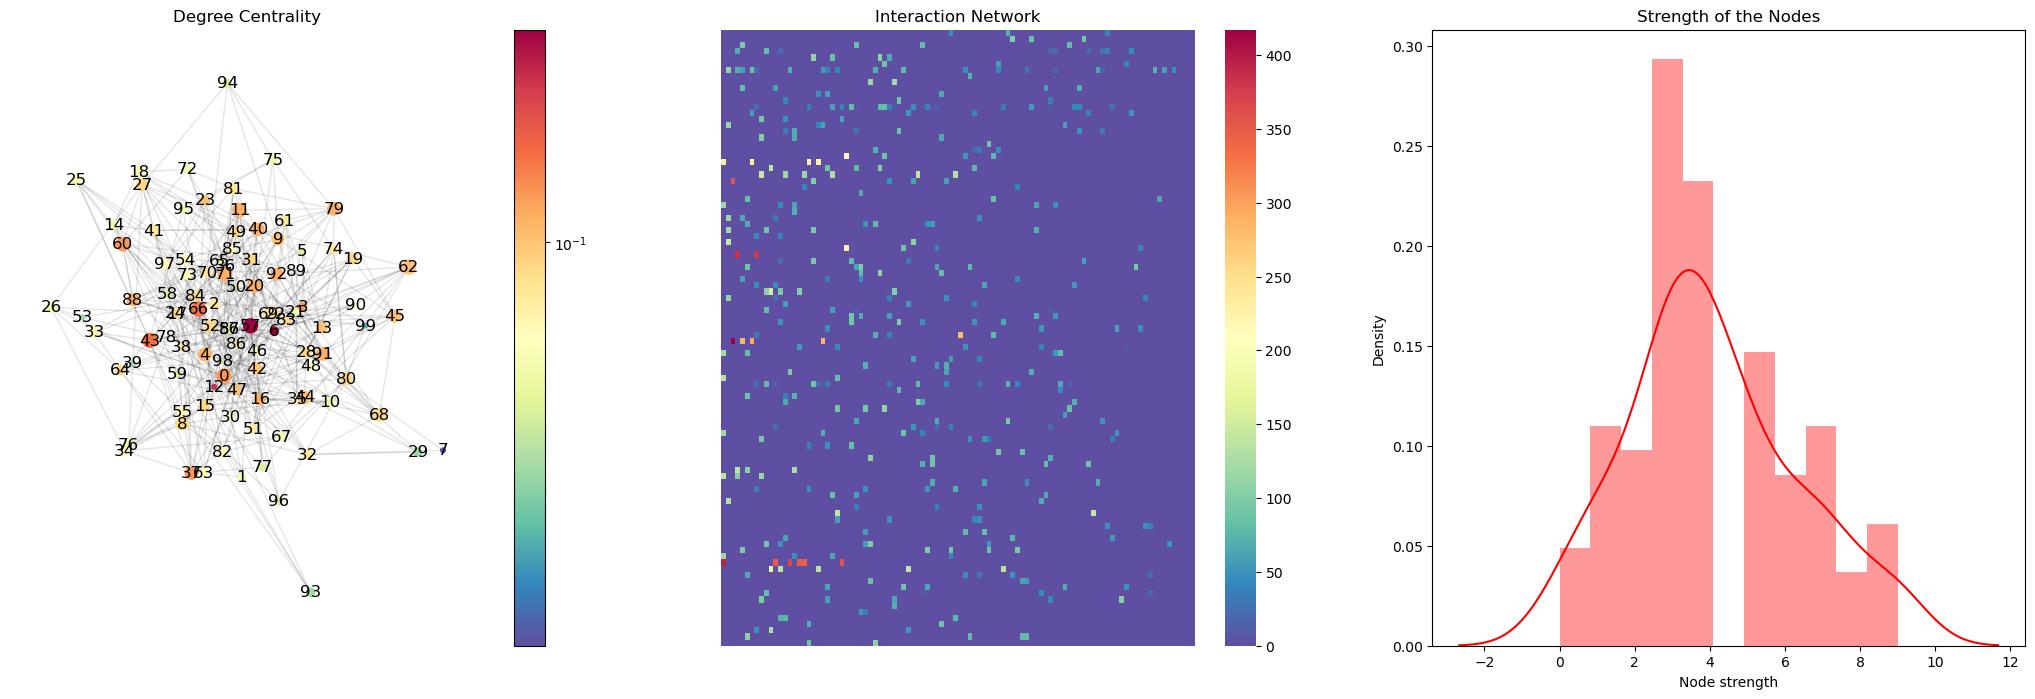

CSO


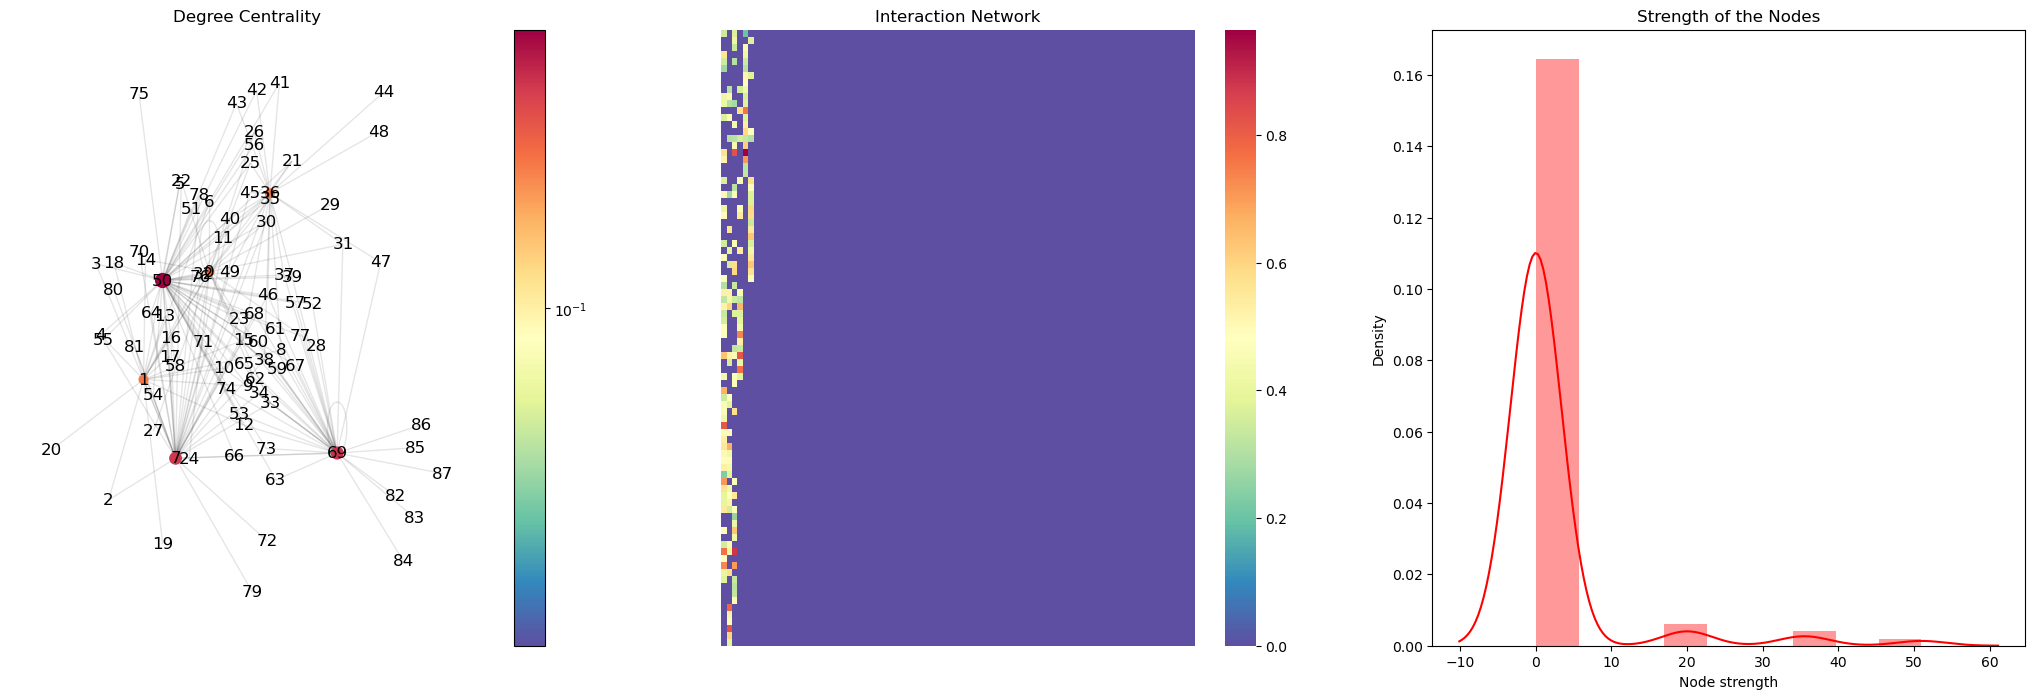

DE


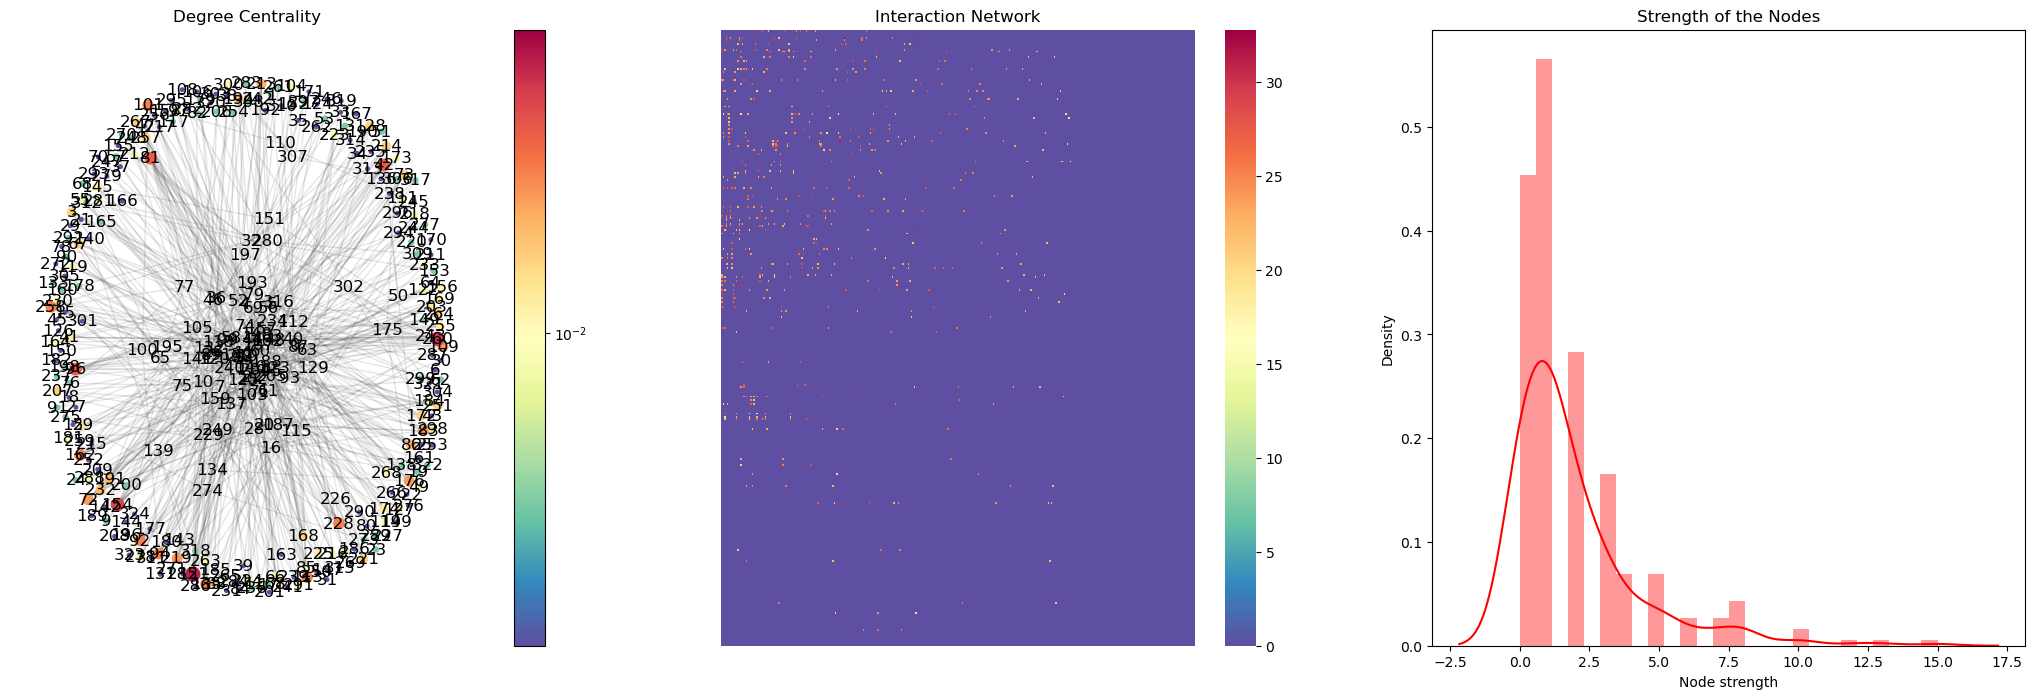

GA


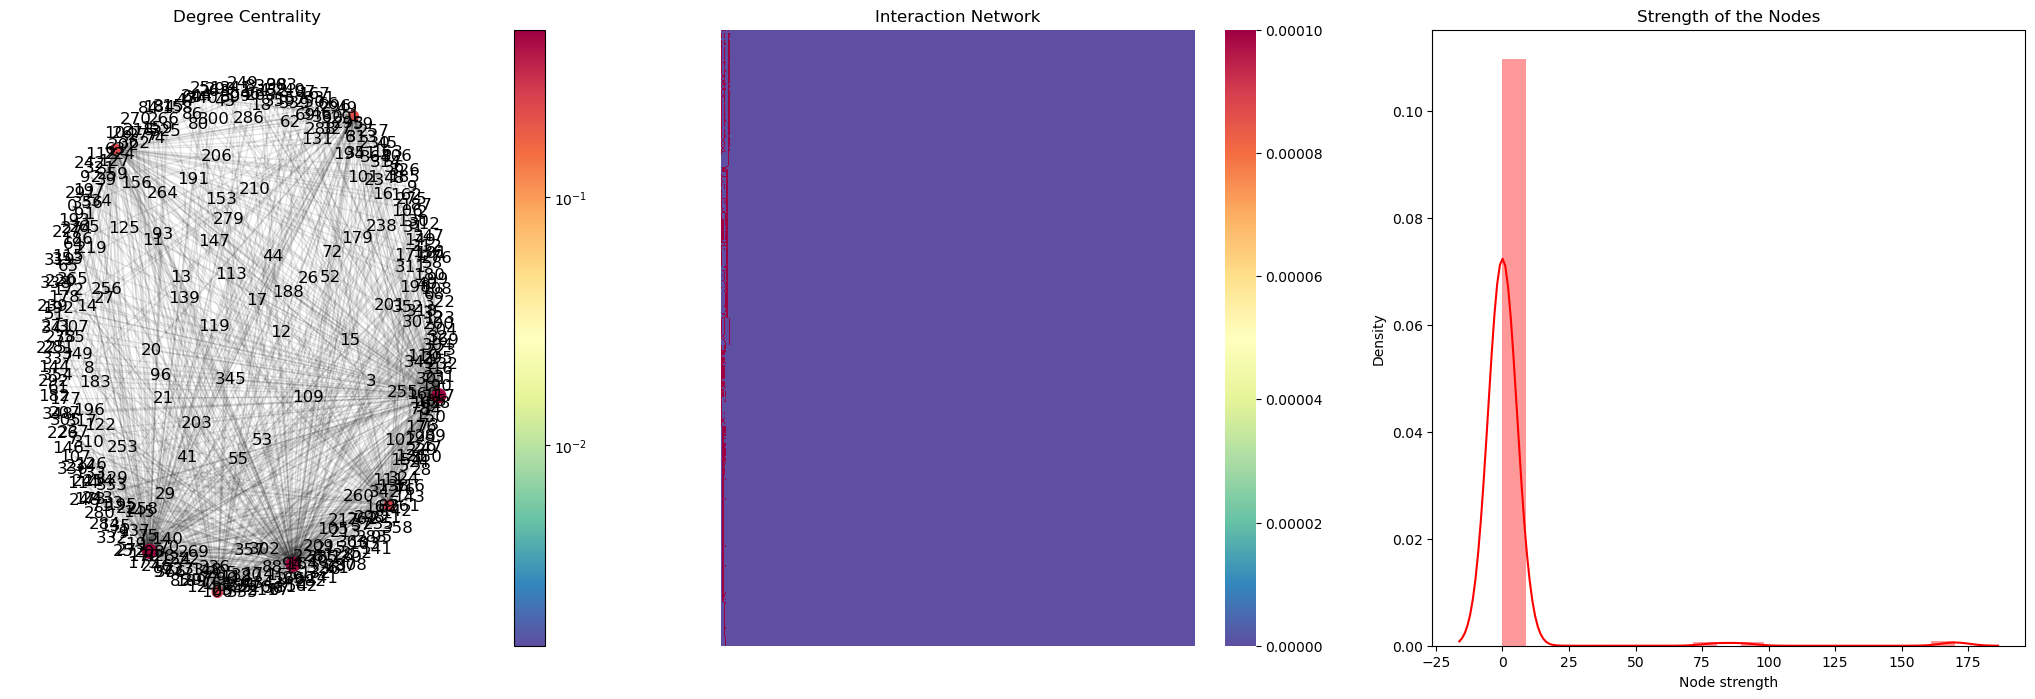

PSOPS


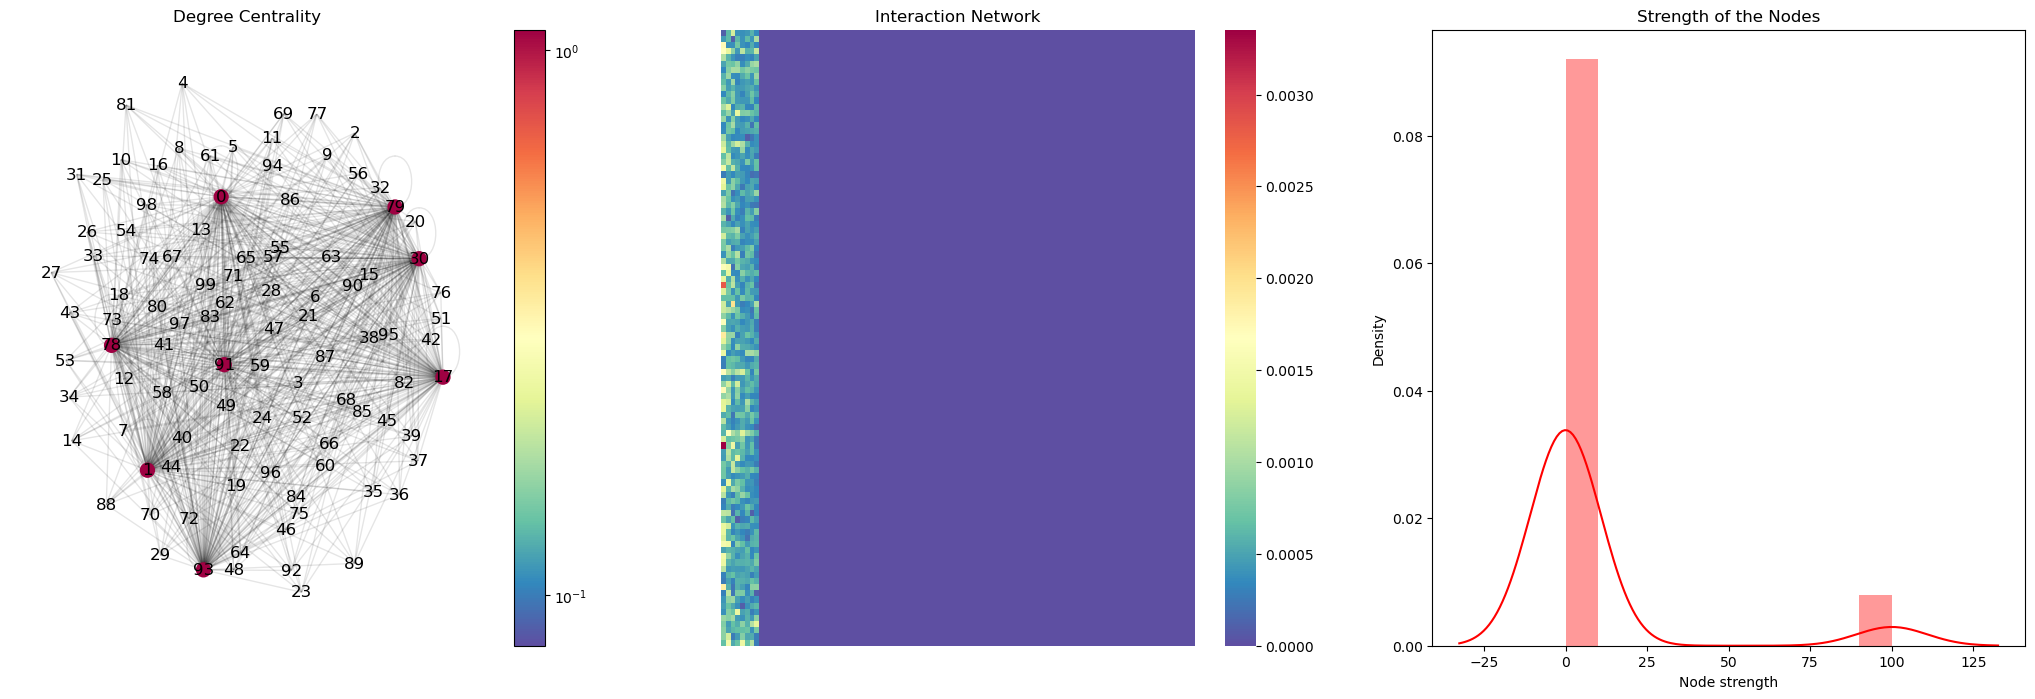

MeABC


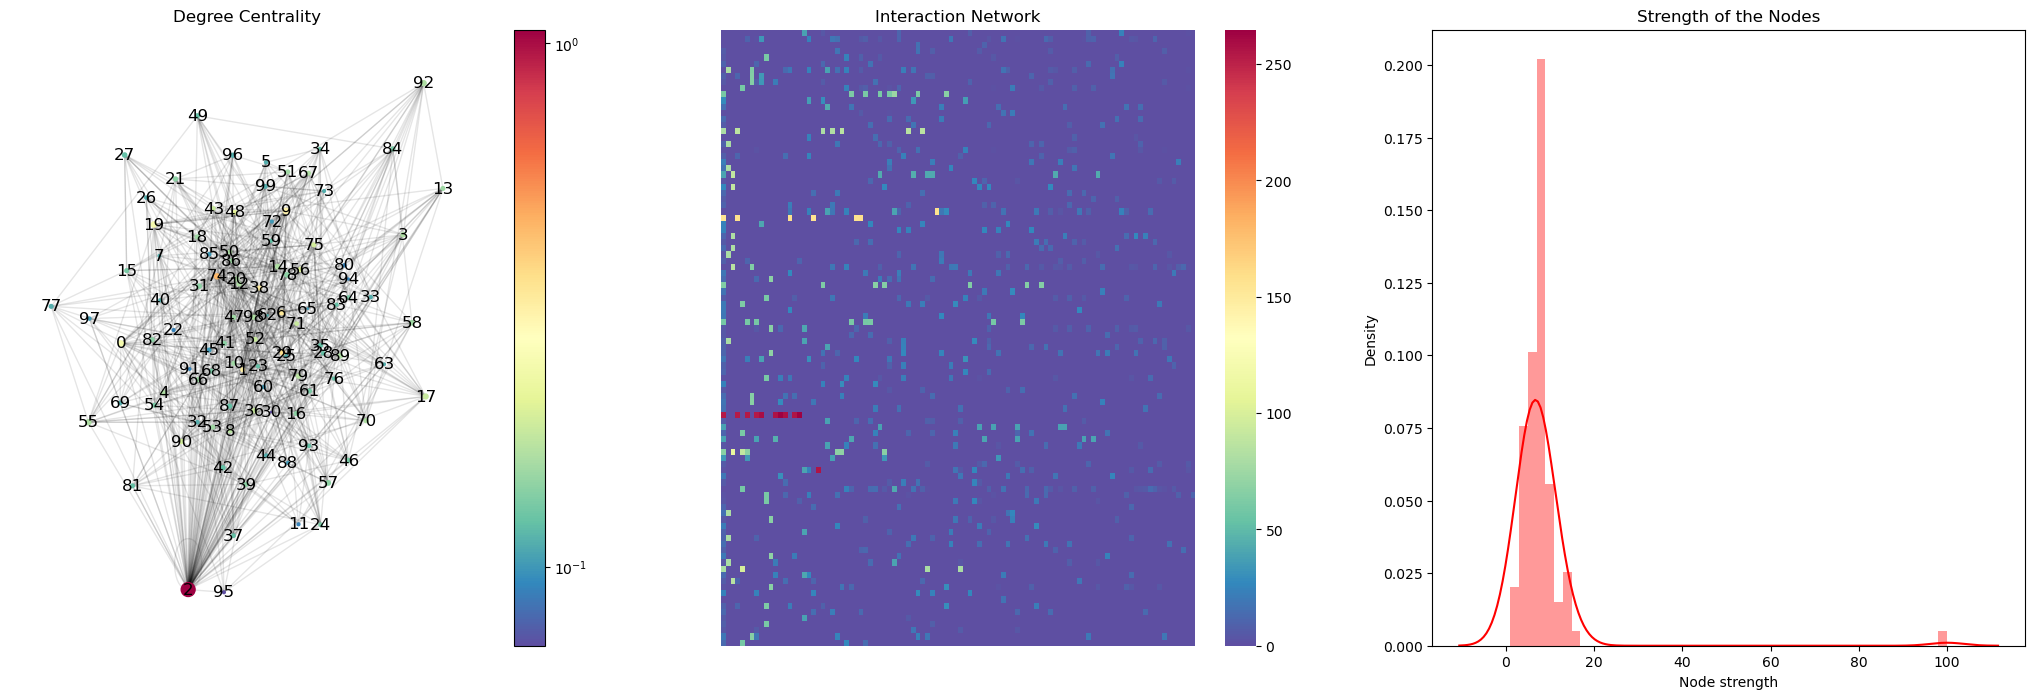

In [5]:
for alg_name, data in tqdm(networks_per_tw_dict.items(), leave=False):
    for exec_, networks in data.items():
        for tw_, net in networks.items():
            file_name = '/{}_{}_tw_size{}_tw{}_ex{}.gml'.format(alg_name, problem, tw_size, tw_, exec_)
            nx.write_gml(net, processed_results_dir + file_name)
    plot_sample_network(alg_name, net)

<div class="alert alert-block alert-success" style="font-size: 16px"> Using PD to compare different executions</div>

  0%|          | 0/8 [00:00<?, ?it/s]

GPSO_GPSO


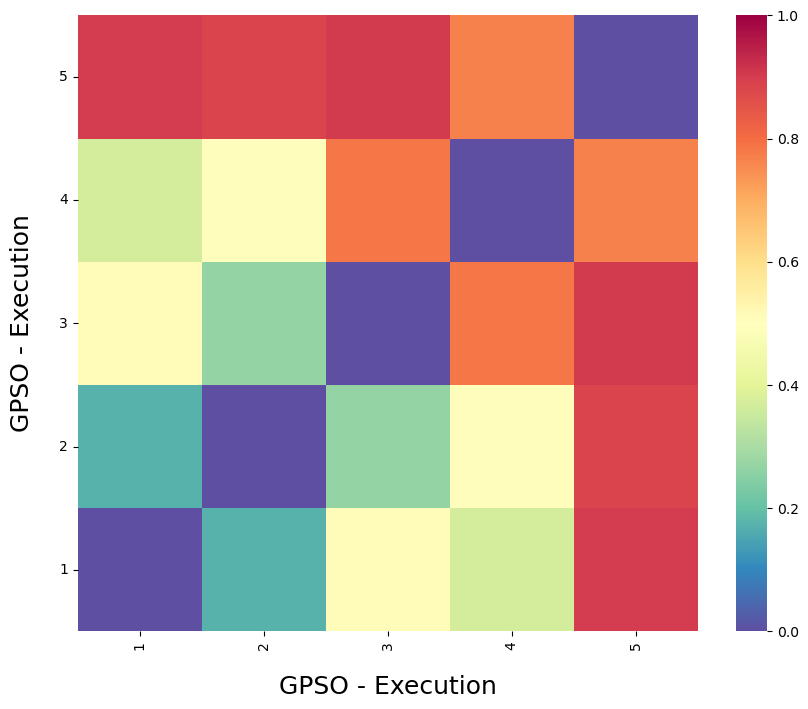

LPSO_LPSO


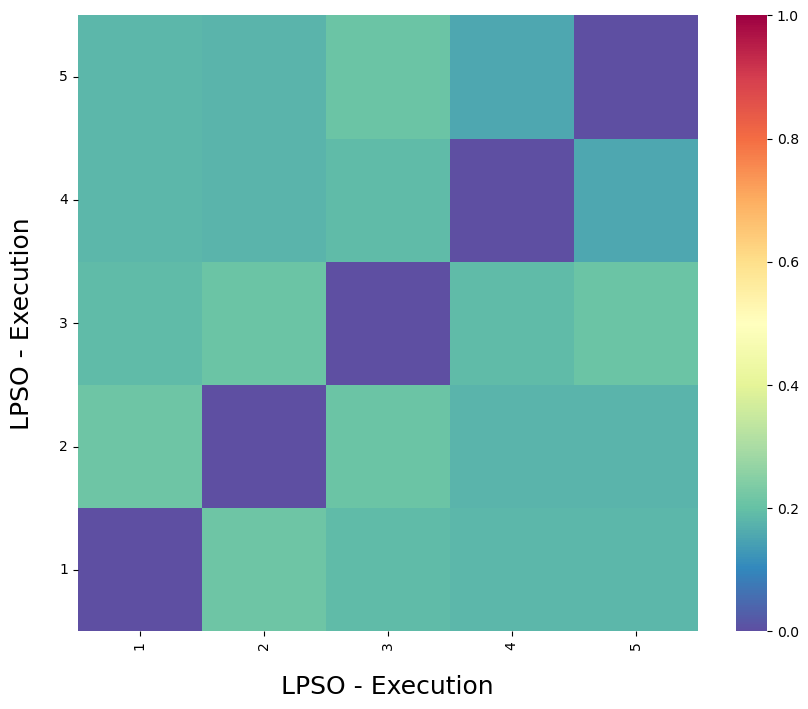

ABC_ABC


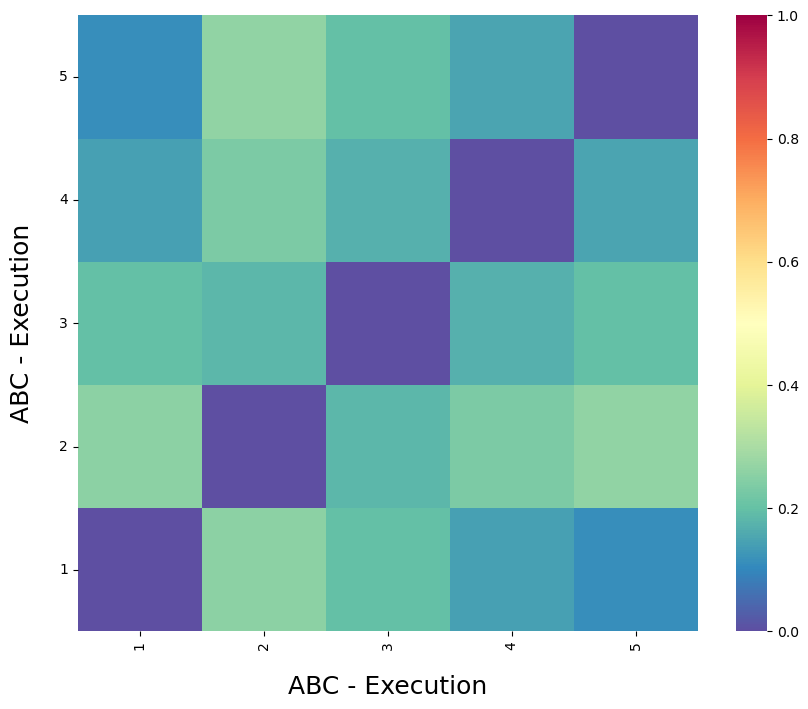

CSO_CSO


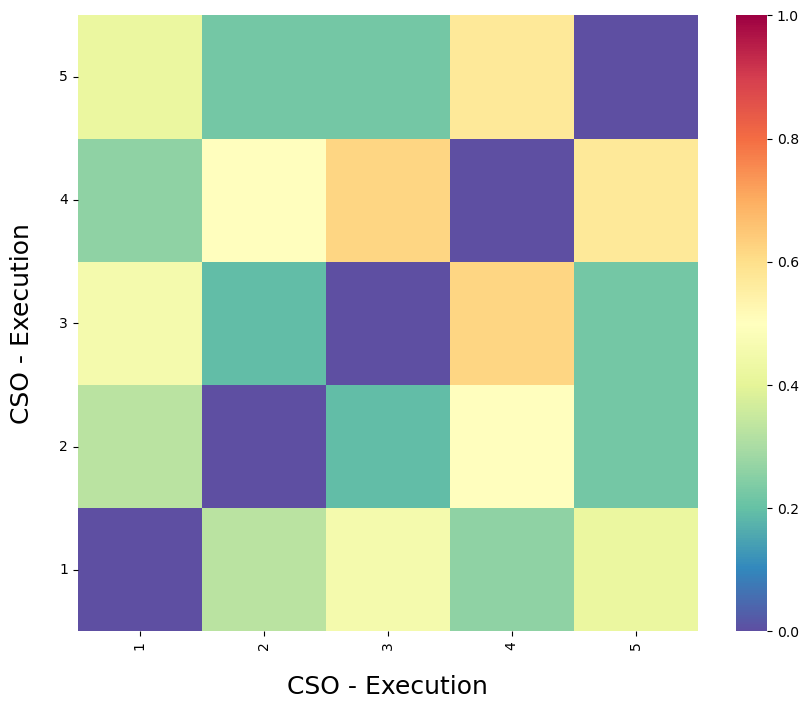

DE_DE


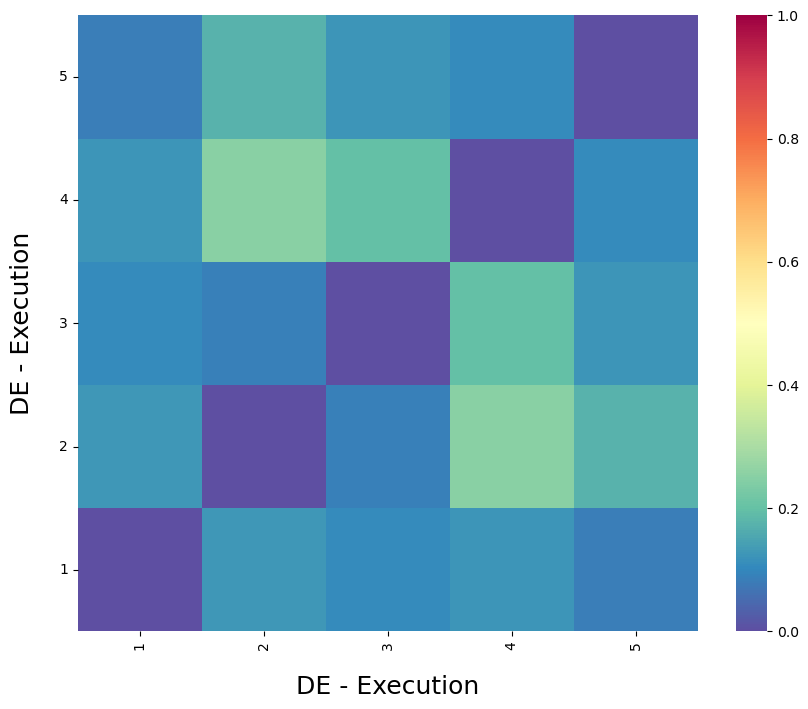

GA_GA


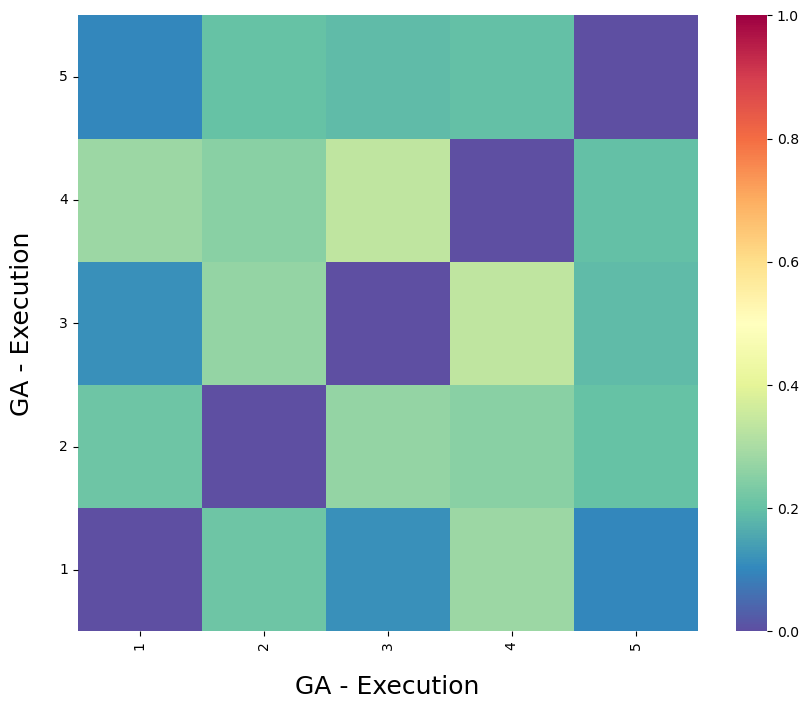

PSOPS_PSOPS


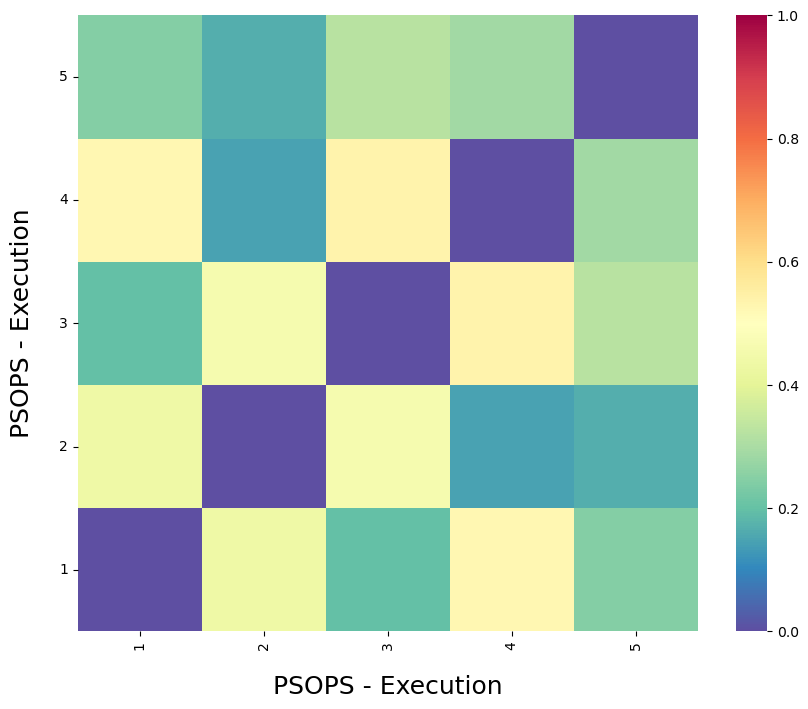

MeABC_MeABC


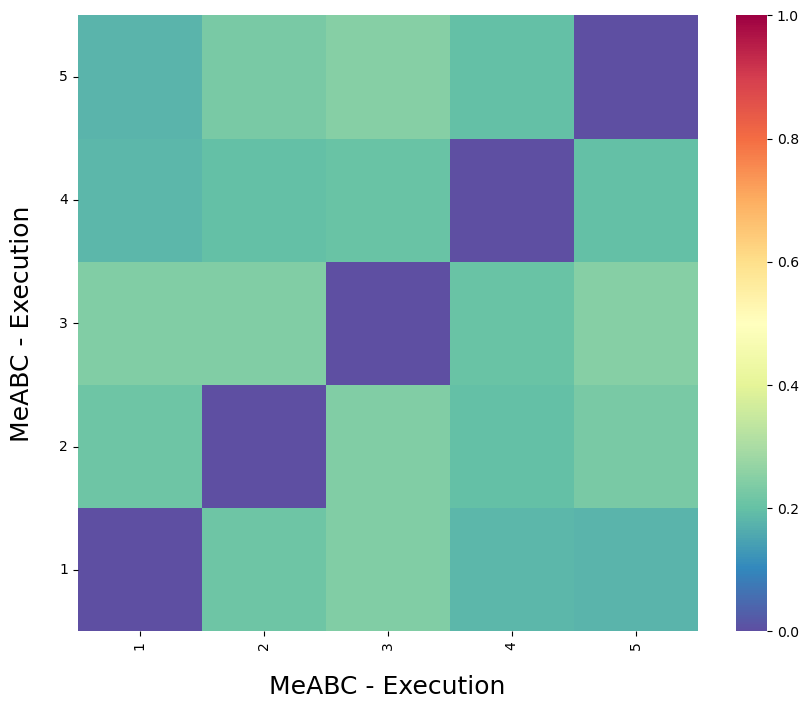

In [6]:
for alg_name1, data1 in tqdm(networks_per_tw_dict.items(), leave=False):
    plot_matrix_exec((alg_name1, data1), (alg_name1, data1), "_".join([str(alg_name1), str(alg_name1)]), processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Using PD to compare different time windows</div>

  0%|          | 0/8 [00:00<?, ?it/s]

GPSO GPSO


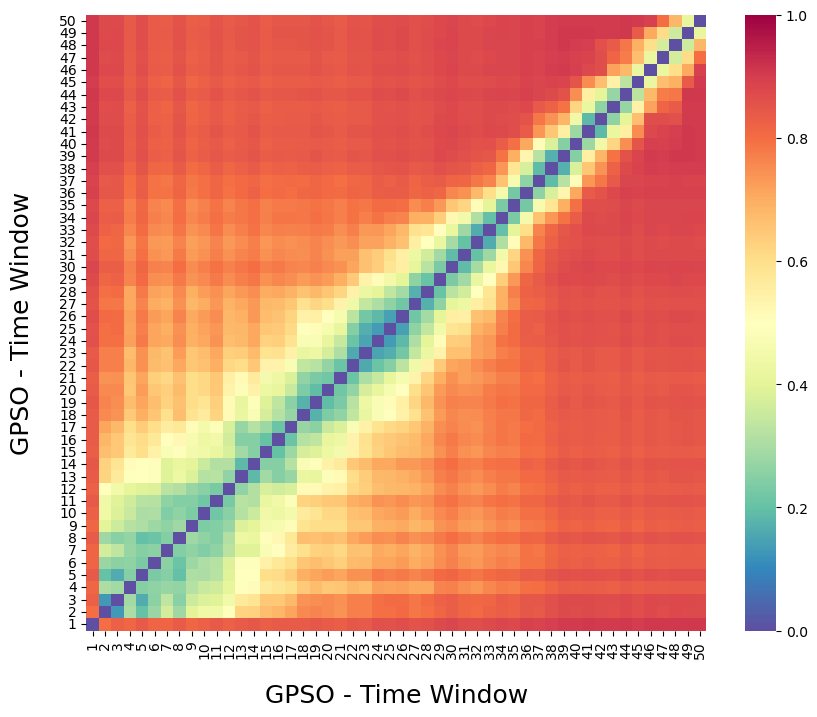

LPSO LPSO


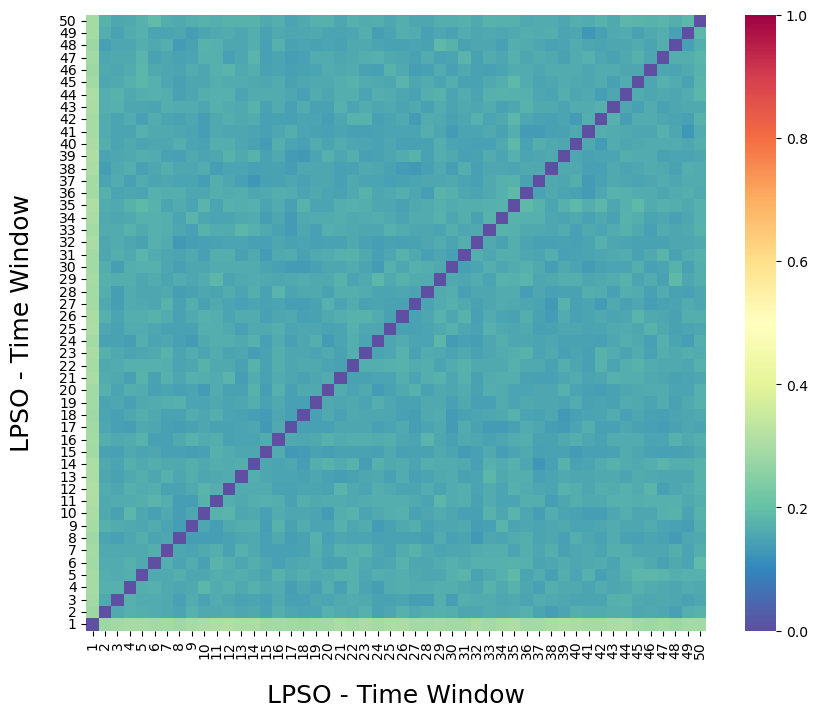

ABC ABC


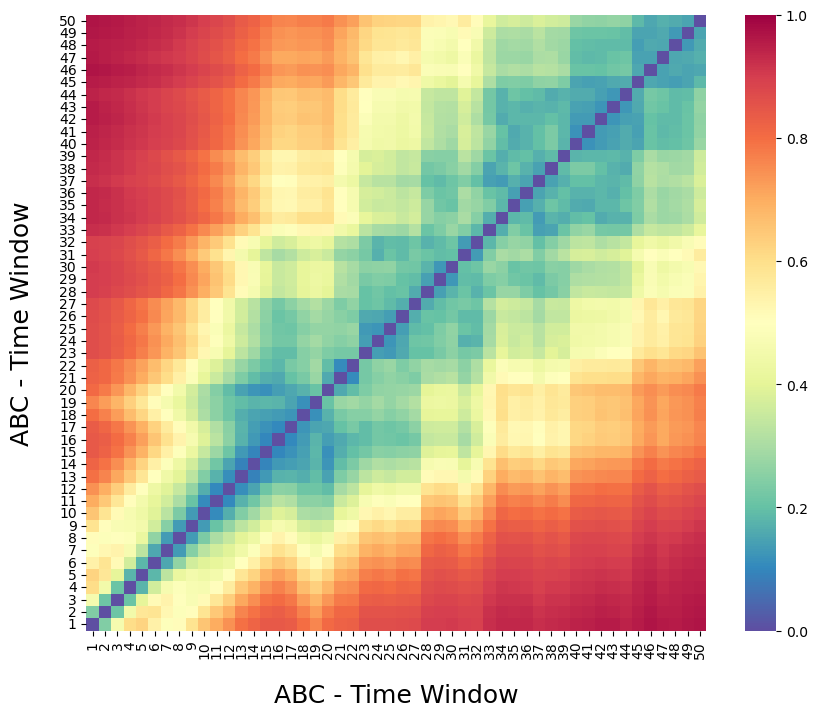

CSO CSO


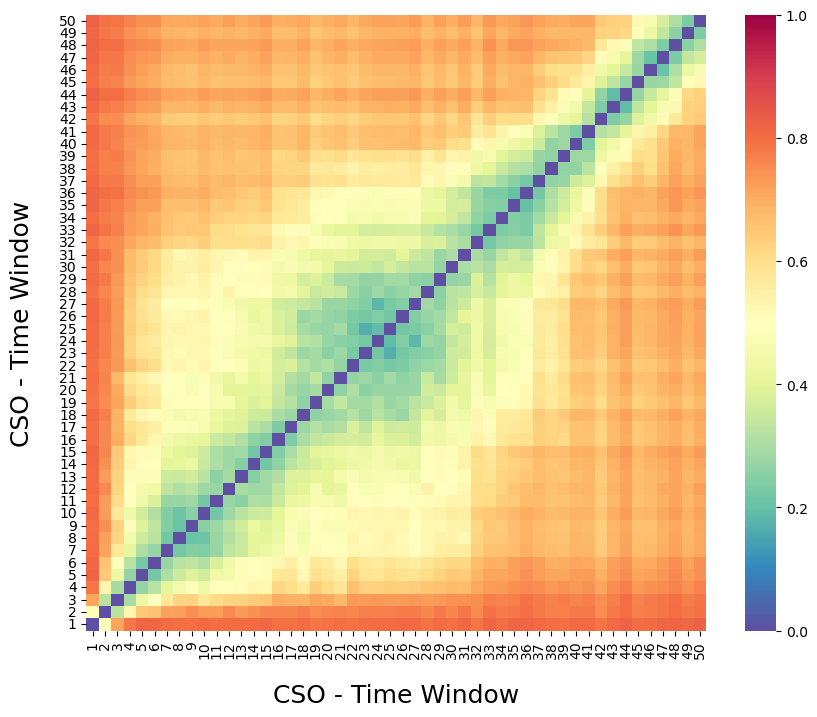

DE DE


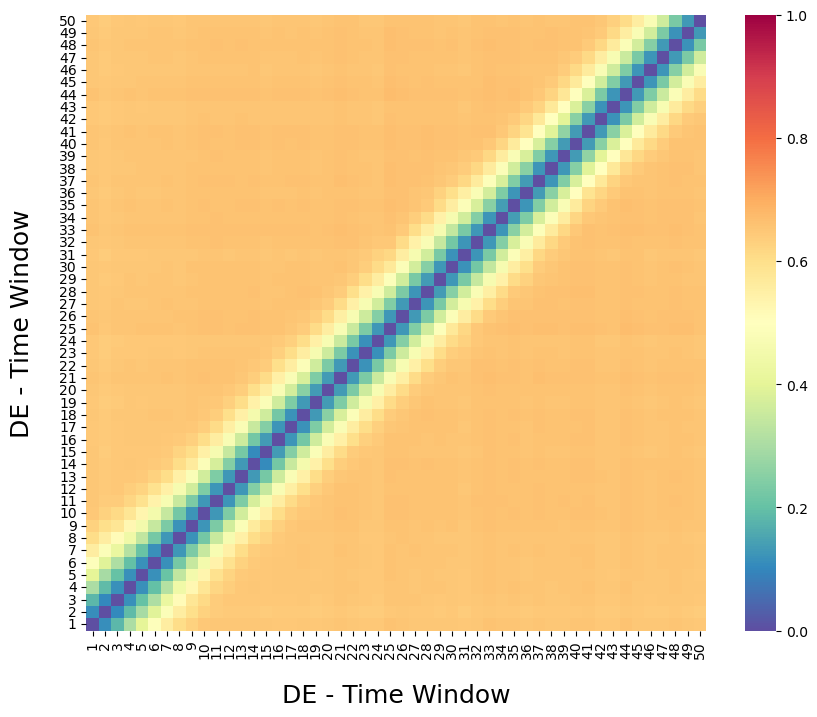

GA GA


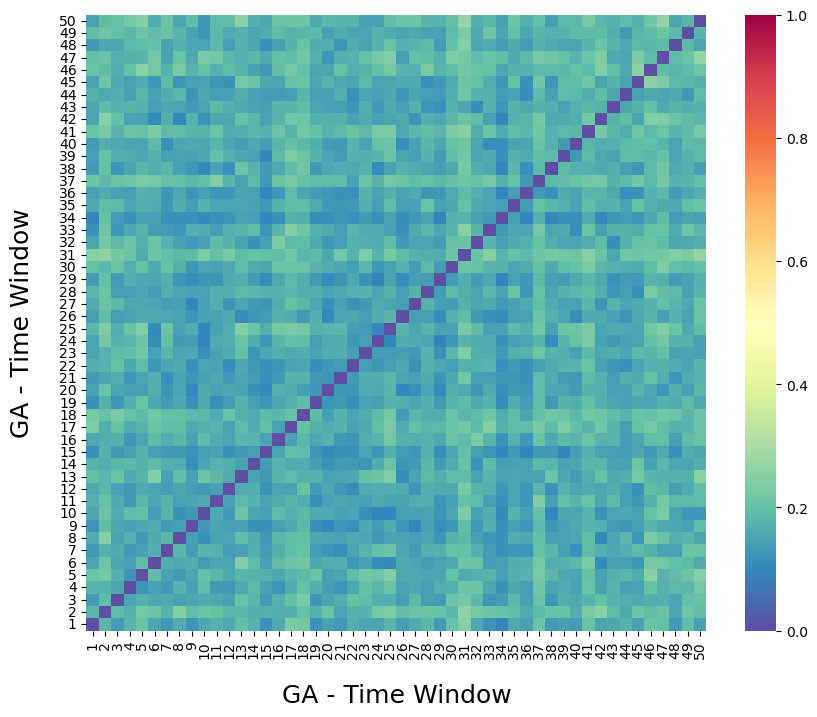

PSOPS PSOPS


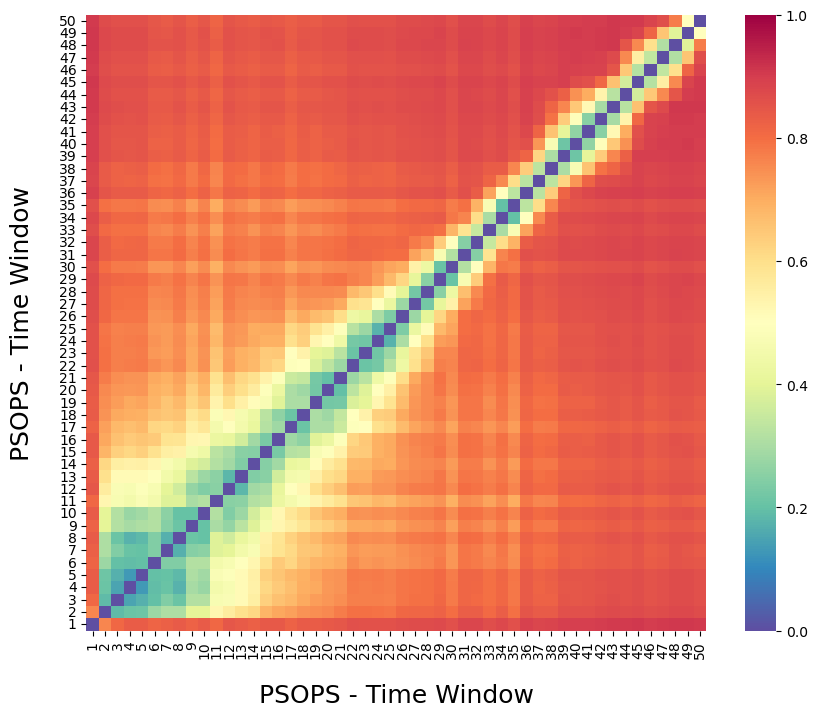

MeABC MeABC


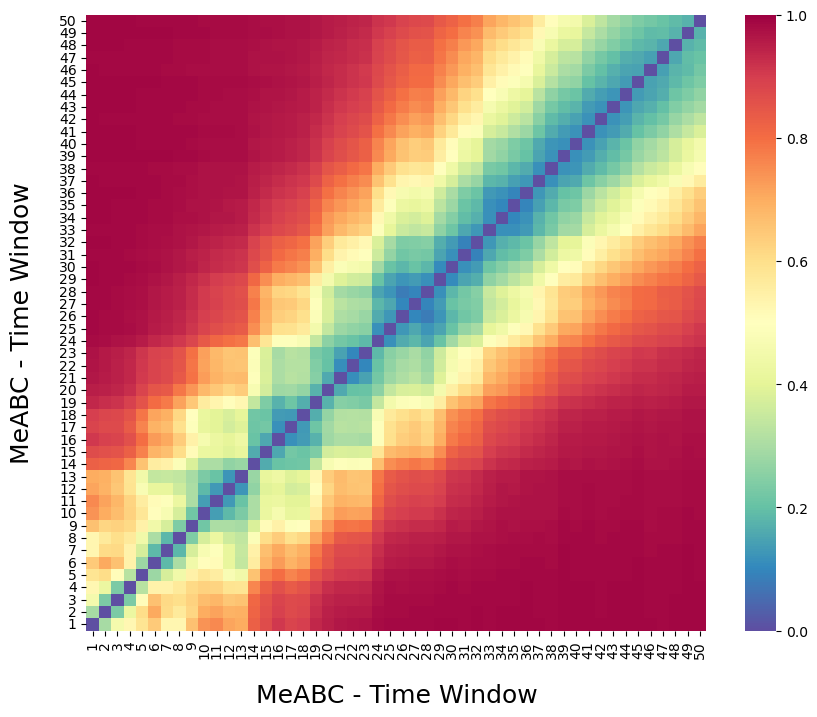

In [7]:
for alg_name1, data1 in tqdm(networks_per_tw_dict.items(), leave=False):
    plot_matrix_tw((alg_name1, data1), (alg_name1, data1), tw_size, processed_results_dir)

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualisation of optimisation metrics </div>

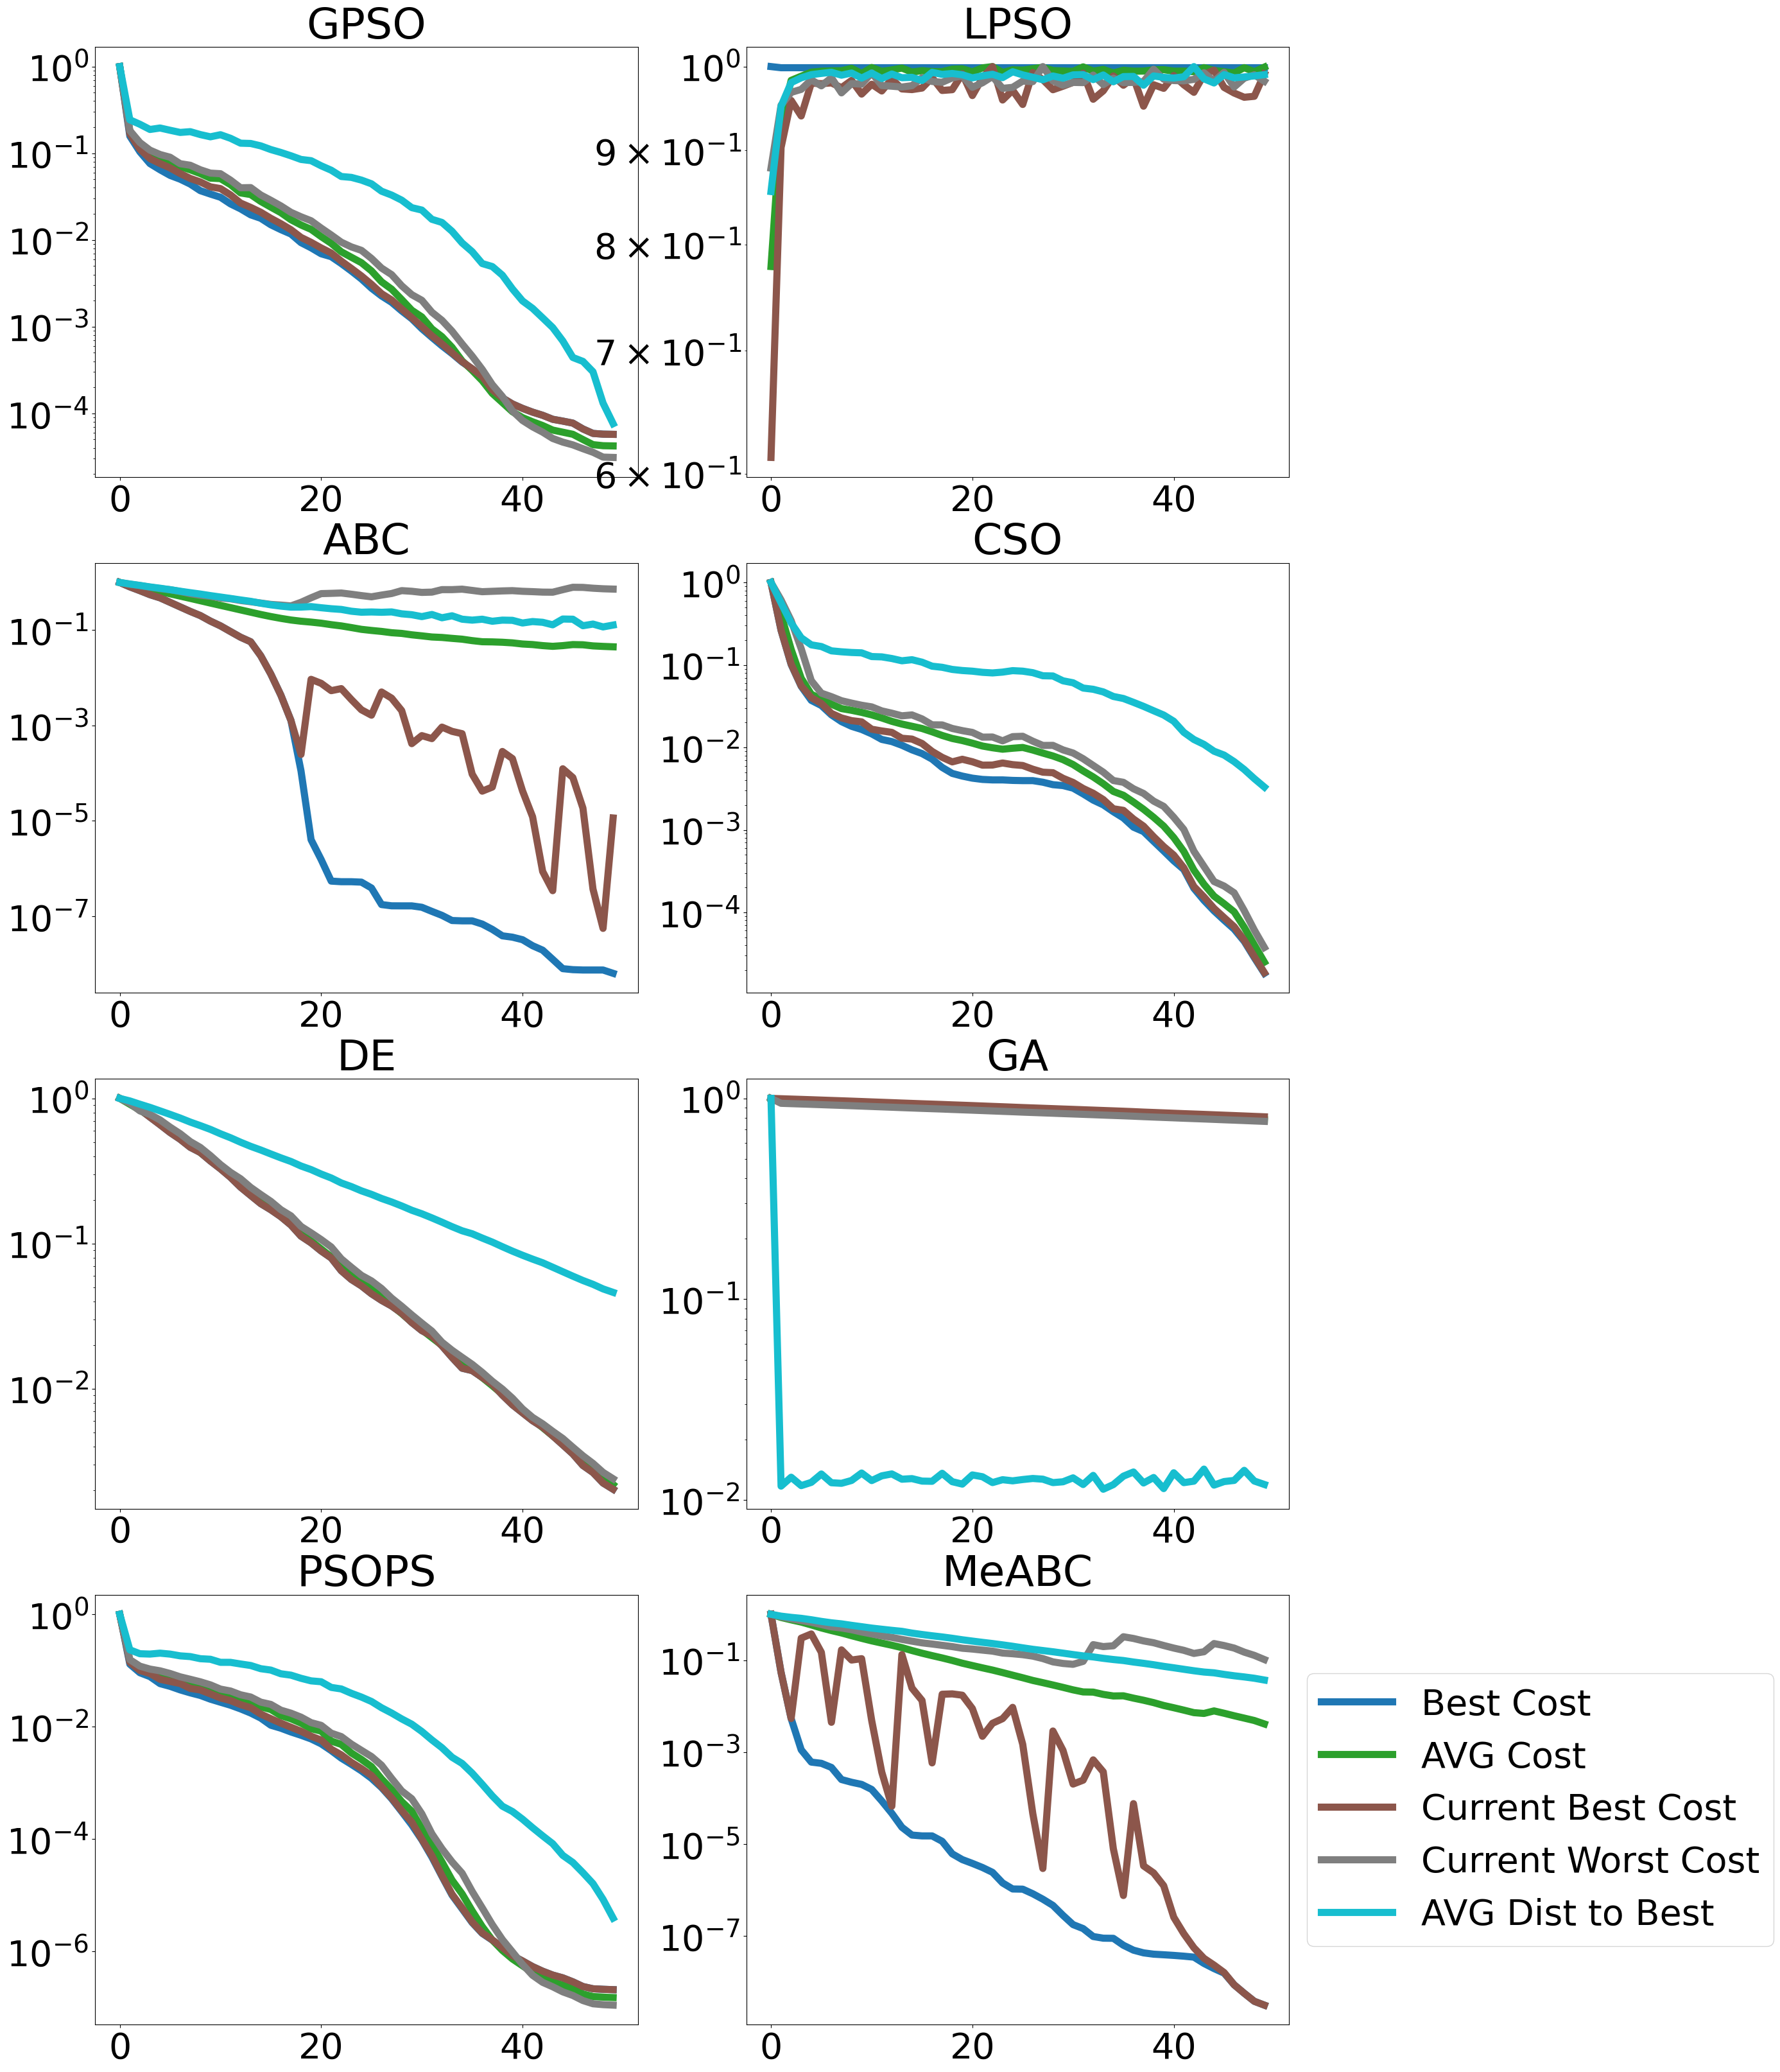

In [8]:
swarm_data = {}
for alg, data in networks_per_tw_dict.items():  
    temp_ = load_data_per_tw(alg, num_execs=num_executions, num_iter=num_iter, tw=tw_size, dim=problem_dim, 
                             func=problem, output_dir=output_dir)
    swarm_data[alg] = temp_
plot_swarm_curves(swarm_data, show_std=False,log=True)

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualisation of network metrics </div>

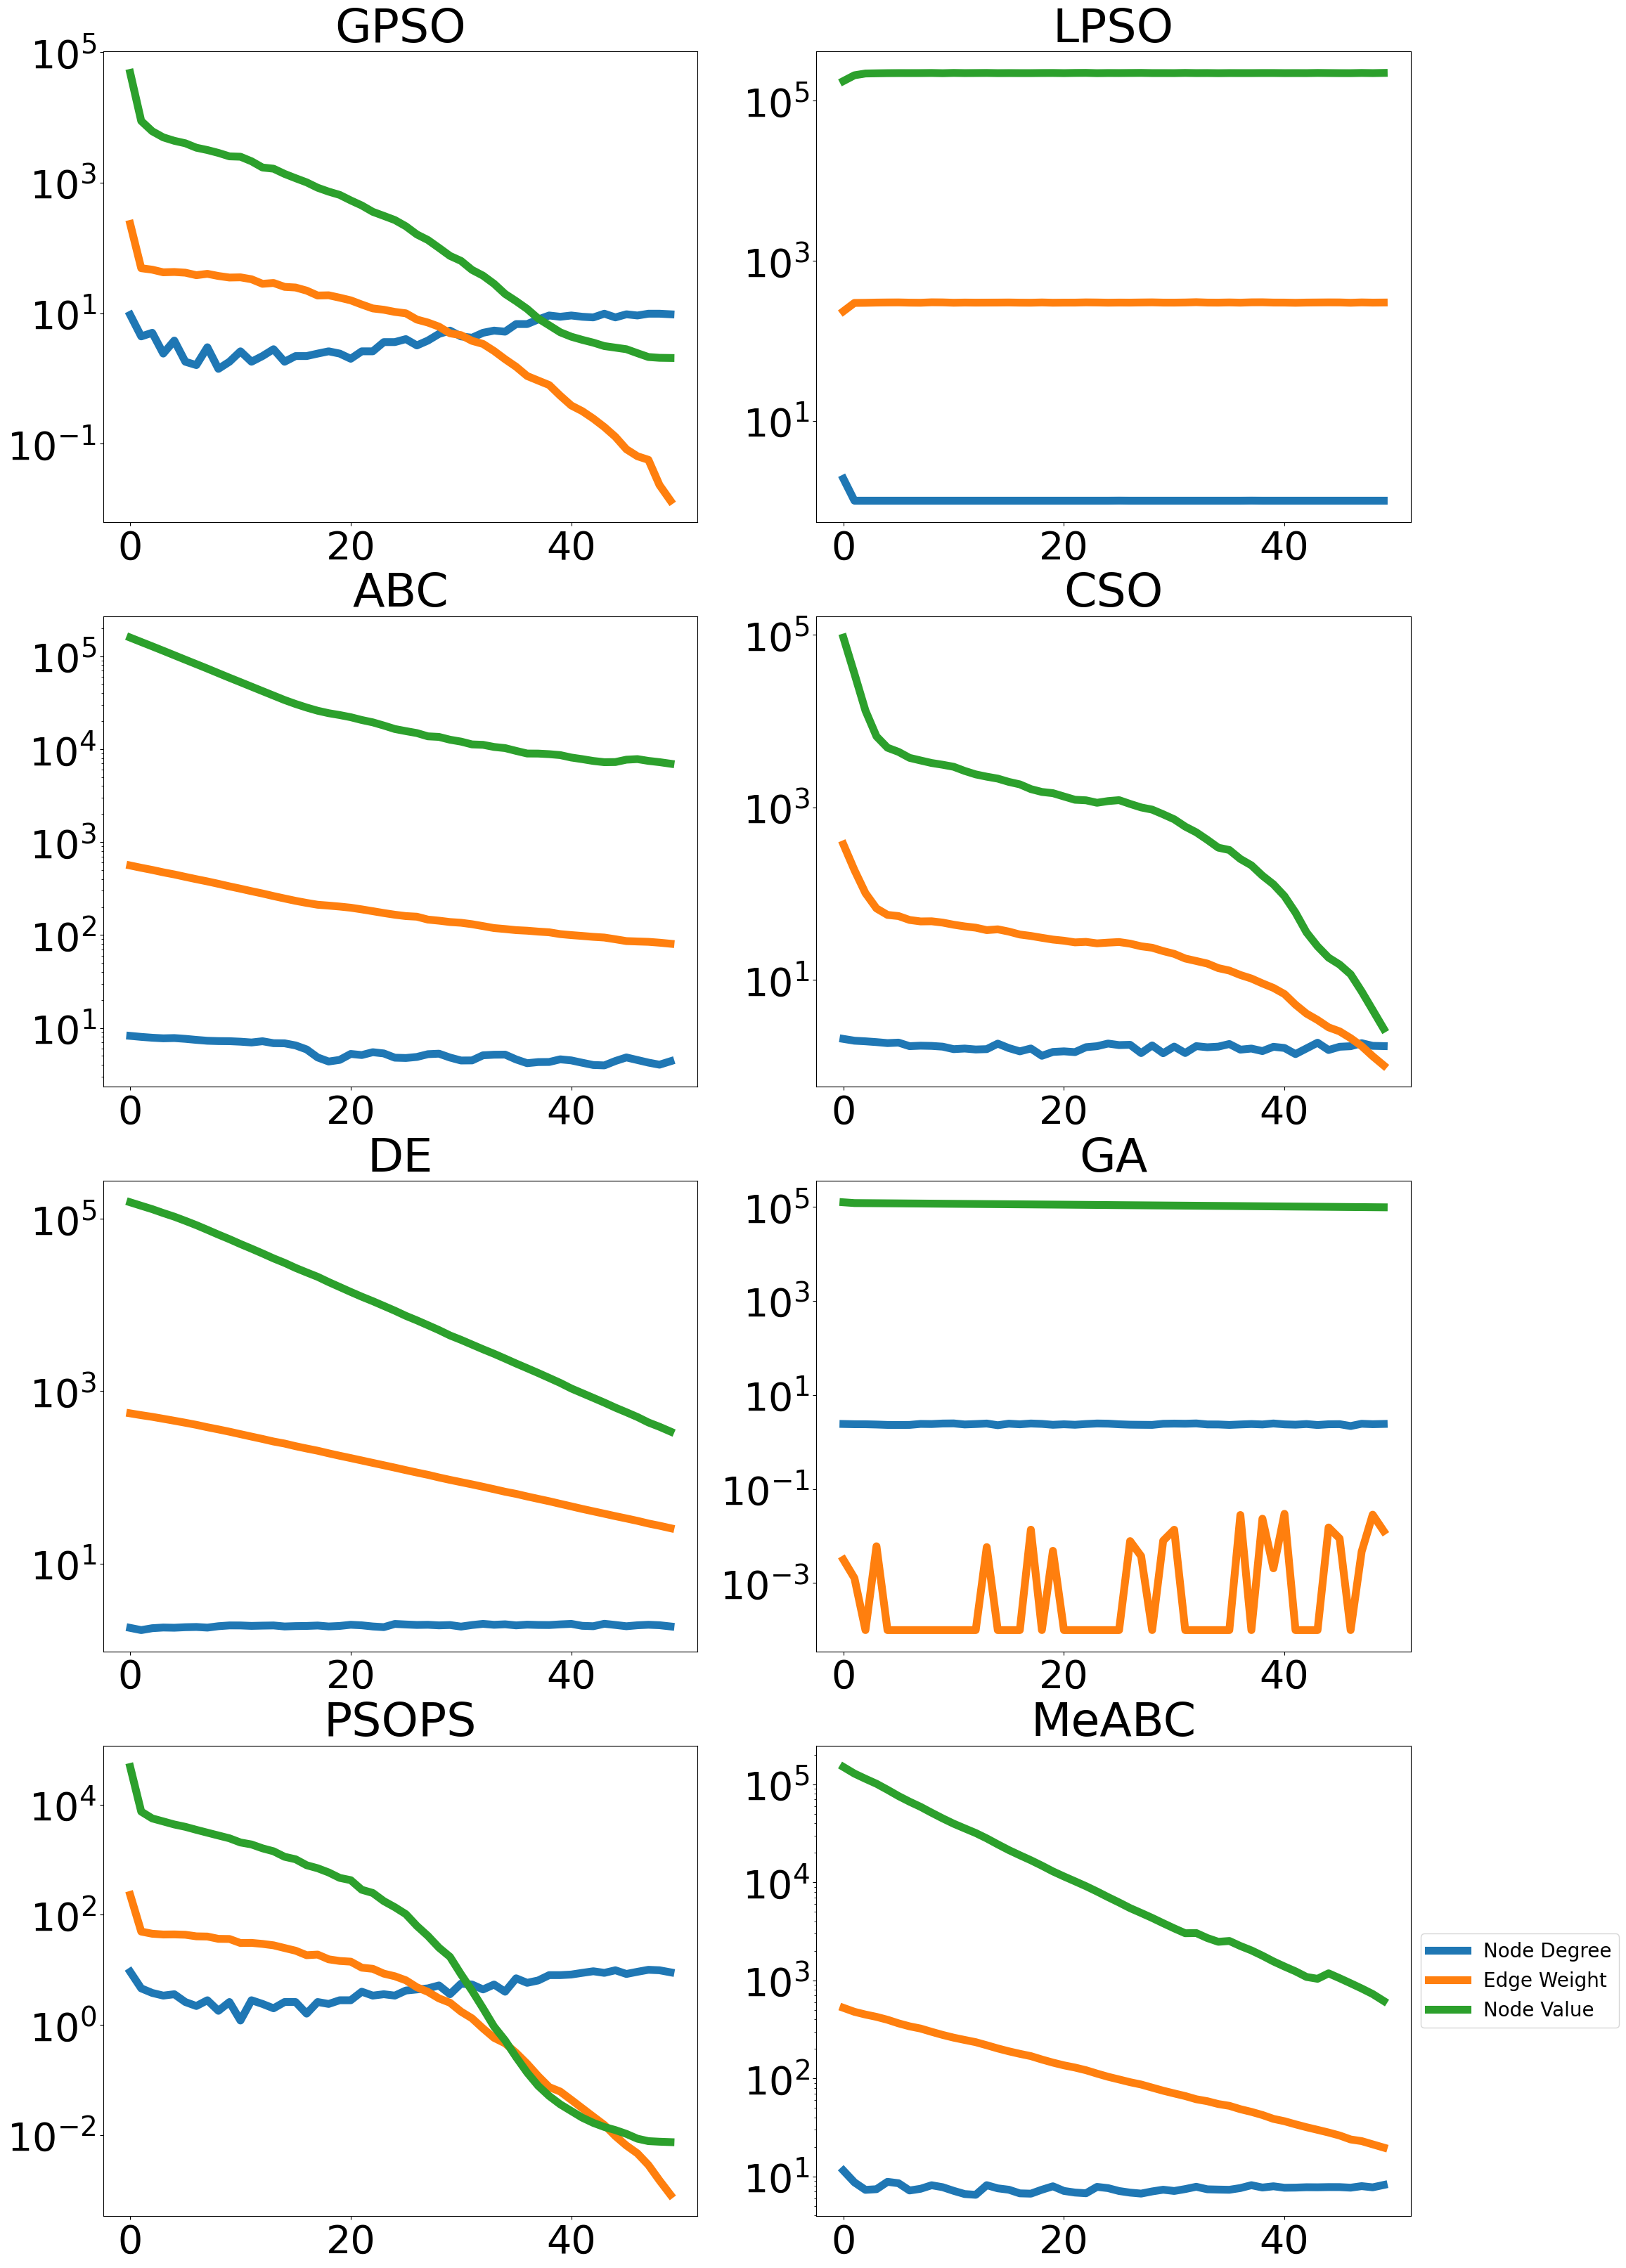

In [9]:
network_data = get_network_data(networks_per_tw_dict)
plot_network_curves(network_data, show_std=False, log=True)

<div class="alert alert-block alert-success" style="font-size: 16px"> Interaction diversity curves</div>

  0%|          | 0/8 [00:00<?, ?it/s]

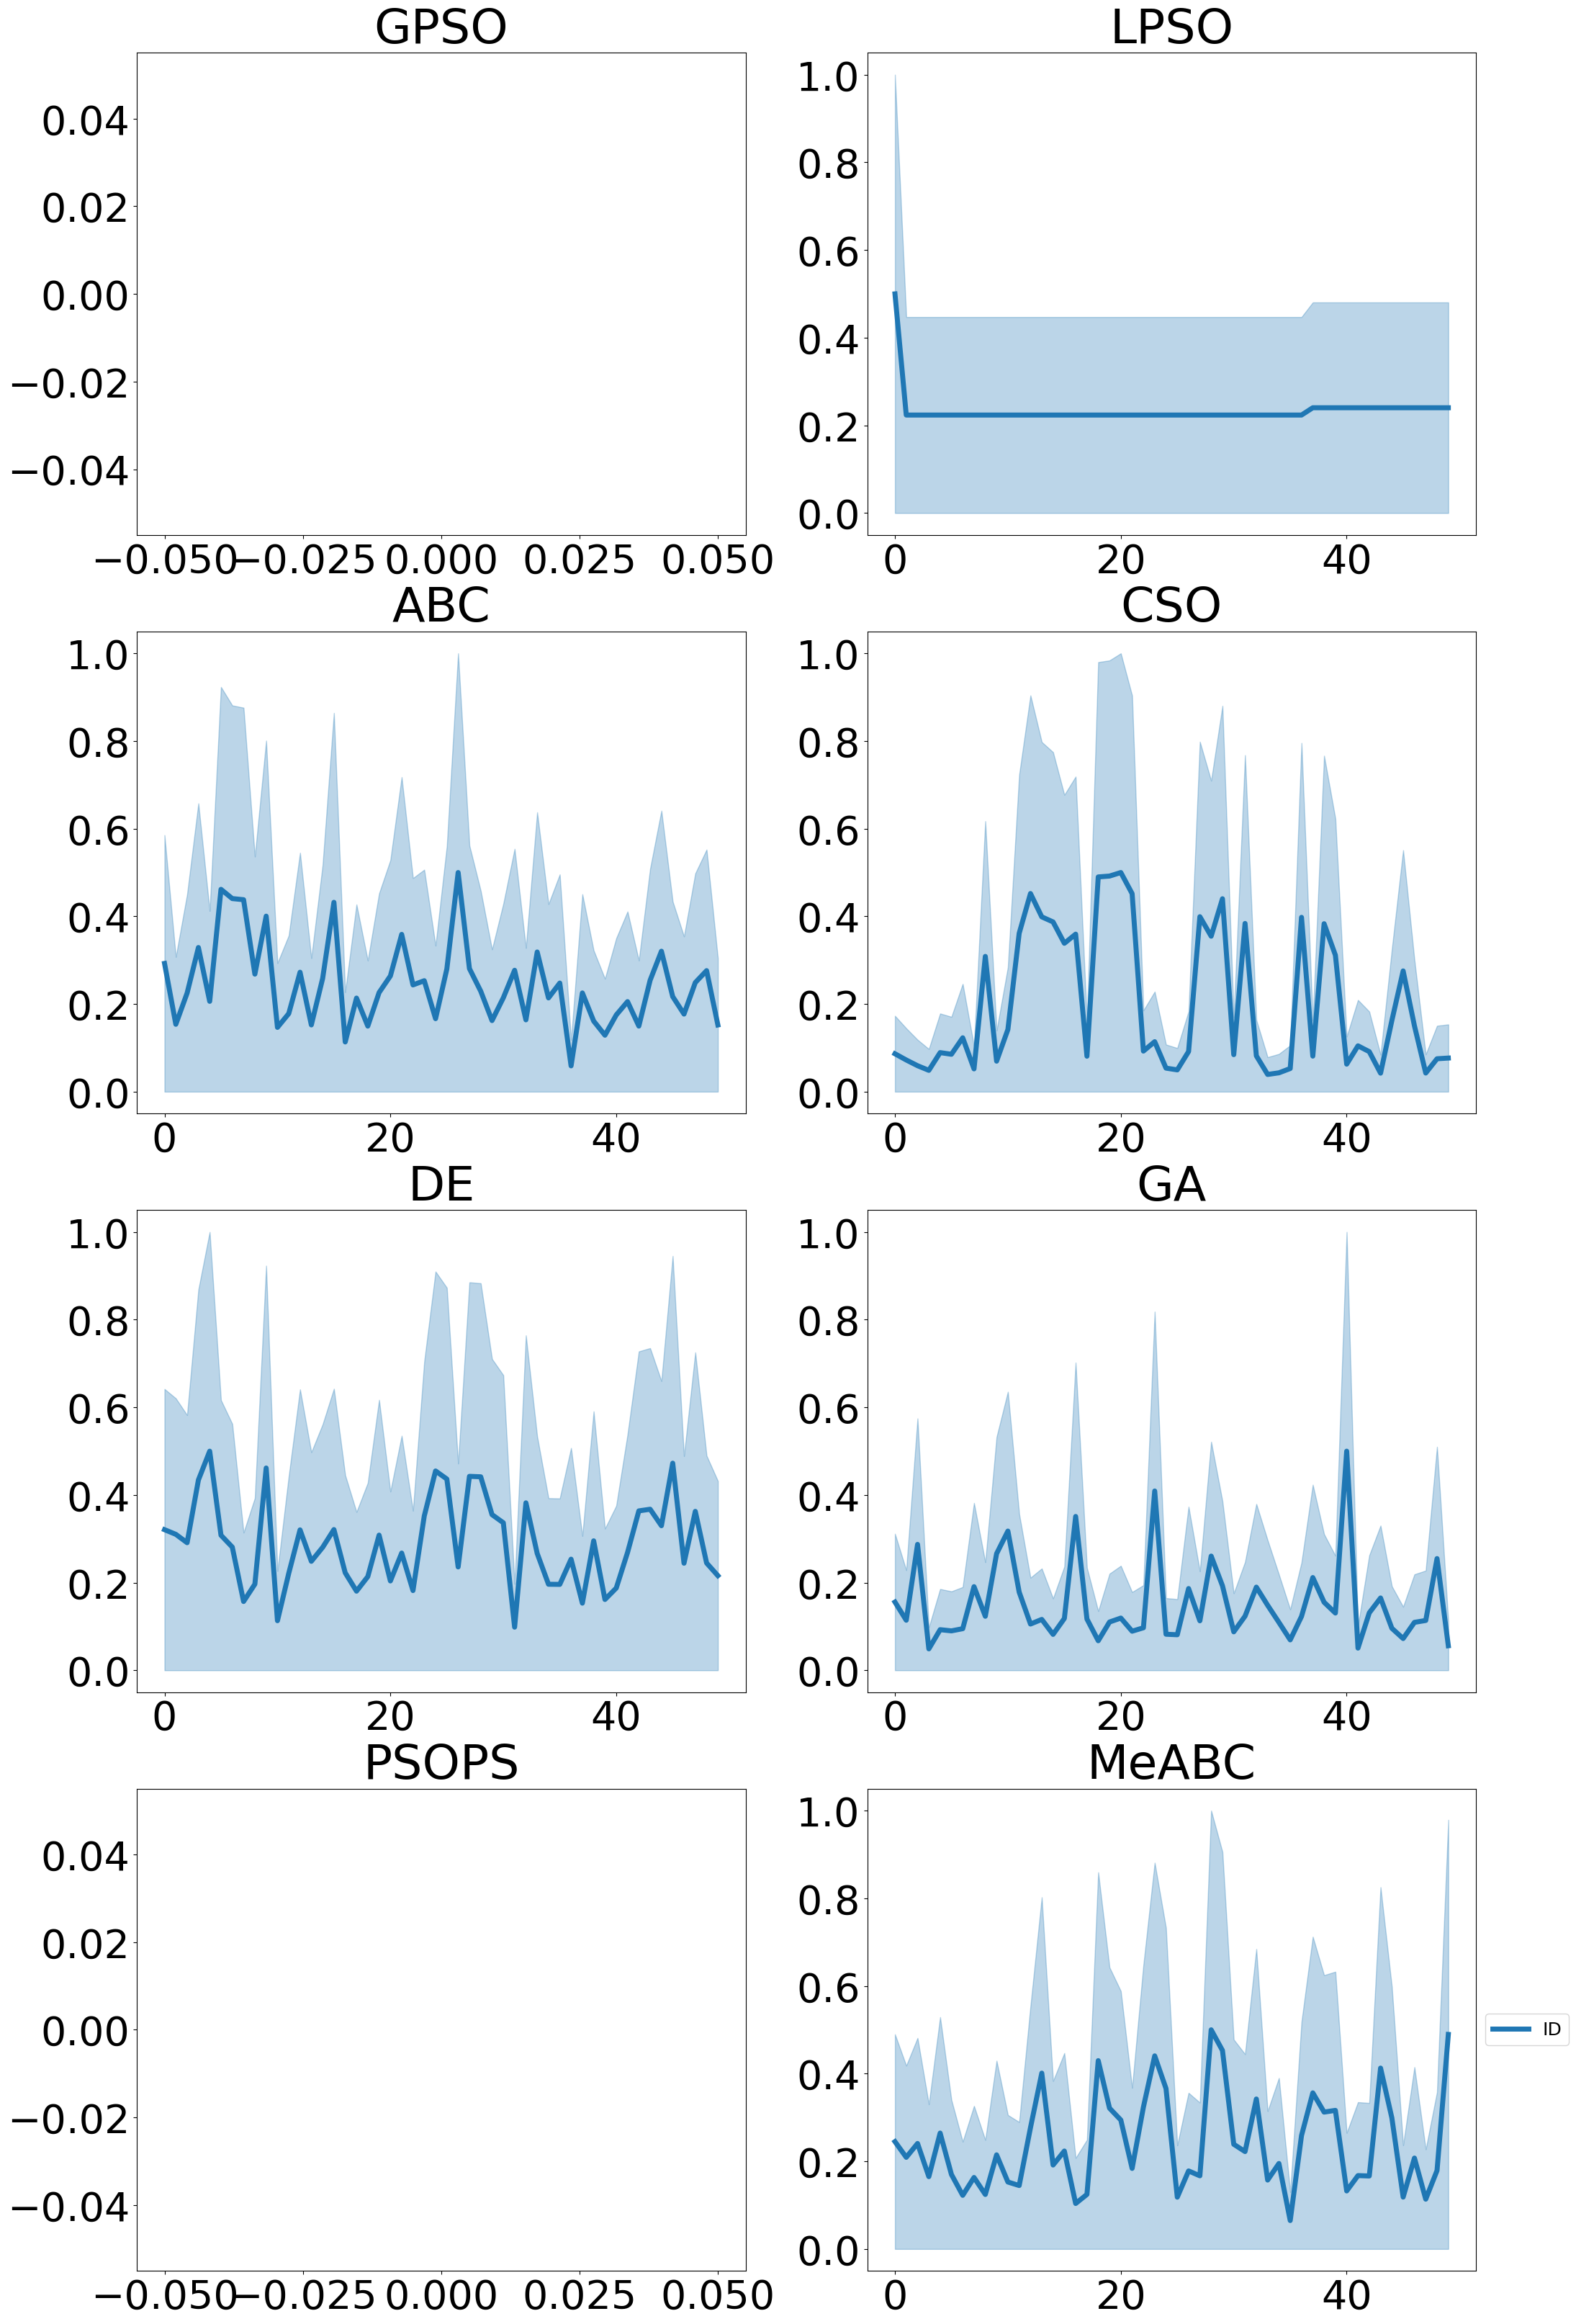

In [10]:
id_data = get_id_data(networks_per_tw_dict)
plot_id_curves(id_data, True) 

<div class="alert alert-block alert-success" style="font-size: 16px">Preparing a dataframe based on the TWs' PD heatmap</div>

In [11]:
alg_dataframe_pd = pd.DataFrame(columns=['Algorithm1', 'Algorithm2', 'PD'])
for a1 in tqdm(algorithms, leave=False):
    for a2 in tqdm(algorithms, leave=False):
        try:
            data_alg = pd.read_csv(processed_results_dir+f'/{a1}_{a2}_pd_difference_results_tw.txt', header=None)
            data_ = [[a1, a2, pd_val] for pd_val in data_alg[0].values]
            temp_df = pd.DataFrame(data_, columns=['Algorithm1', 'Algorithm2', 'PD'])
            alg_dataframe_pd = pd.concat([alg_dataframe_pd, temp_df])
        except:
            pass
alg_dataframe_pd.head()

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Algorithm1 Algorithm2        PD
0       GPSO       GPSO  0.907672
1       GPSO       GPSO  0.884434
2       GPSO       GPSO  0.893203
3       GPSO       GPSO  0.826935
4       GPSO       GPSO  0.845383

In [12]:
test_algo_df = pd.DataFrame()
num_tws = num_iter//tw_size
for a in alg_dataframe_pd.Algorithm1.unique():
    line = []
    for e in range(0, num_tws*num_tws*num_executions, num_tws*num_tws):
        mat = np.reshape(alg_dataframe_pd[(alg_dataframe_pd.Algorithm1==a) & (alg_dataframe_pd.Algorithm2==a)]['PD'].values[e:e+(num_tws*num_tws)], (num_tws, num_tws))
        ct = num_tws
        for r in range(num_tws):
            for c in range(ct):
                line.append(mat[r][c])
            ct -= 1
    test_algo_df[a] =  line
test_algo_df.head()

GPSO      LPSO       ABC       CSO        DE        GA     PSOPS  \
0  0.907672  0.311555  0.956628  0.831190  0.643858  0.136163  0.914628   
1  0.884434  0.194053  0.955541  0.743047  0.639607  0.071643  0.893414   
2  0.893203  0.147068  0.947373  0.648193  0.653582  0.156642  0.851208   
3  0.826935  0.181226  0.933021  0.640727  0.653015  0.154949  0.867028   
4  0.845383  0.169757  0.922447  0.676499  0.635113  0.221794  0.884277   

      MeABC  
0  0.990702  
1  0.990697  
2  0.990707  
3  0.990701  
4  0.990699

<div class="alert alert-block alert-success" style="font-size: 16px"> Using different statistical test to compare the distributions of the algorithms</div>

In [13]:
for a1 in test_algo_df.columns:
    for a2 in test_algo_df.columns:
        ks = kendalltau(test_algo_df[a1].values, test_algo_df[a2].values)
        print('{} vs {}: '.format(a1, a2), ks)
    print()

GPSO vs GPSO:  SignificanceResult(statistic=0.9999999999999998, pvalue=0.0)
GPSO vs LPSO:  SignificanceResult(statistic=0.11828290262876823, pvalue=2.343141501420542e-45)
GPSO vs ABC:  SignificanceResult(statistic=0.2934926972718961, pvalue=1.7184048056612274e-269)
GPSO vs CSO:  SignificanceResult(statistic=0.5118254965525297, pvalue=0.0)
GPSO vs DE:  SignificanceResult(statistic=0.3811369913325107, pvalue=0.0)
GPSO vs GA:  SignificanceResult(statistic=0.11800568085247871, pvalue=3.687908721264401e-45)
GPSO vs PSOPS:  SignificanceResult(statistic=0.6850544880990688, pvalue=0.0)
GPSO vs MeABC:  SignificanceResult(statistic=0.34276689917315234, pvalue=0.0)

LPSO vs GPSO:  SignificanceResult(statistic=0.11828290262876824, pvalue=2.343141501420542e-45)
LPSO vs LPSO:  SignificanceResult(statistic=1.0, pvalue=0.0)
LPSO vs ABC:  SignificanceResult(statistic=0.12576130230094773, pvalue=4.3746674519451403e-51)
LPSO vs CSO:  SignificanceResult(statistic=0.1332305547477172, pvalue=4.1017470862333

<div class="alert alert-block alert-success" style="font-size: 16px"> Creating the adjacency matrix based on the PD heatmaps per TWs</div>

10.992187155073603


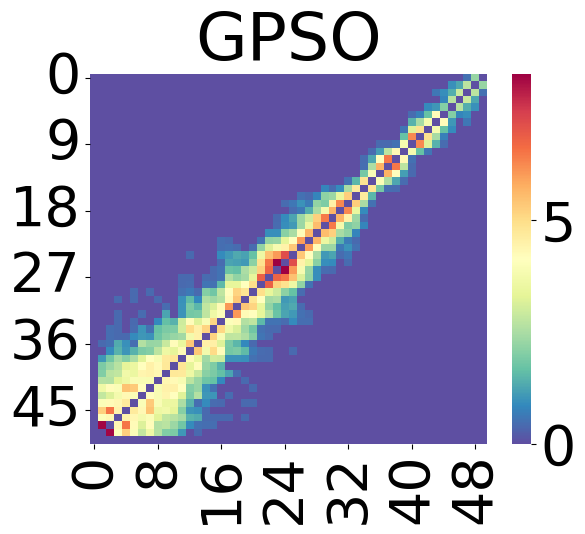

13.526145655390835


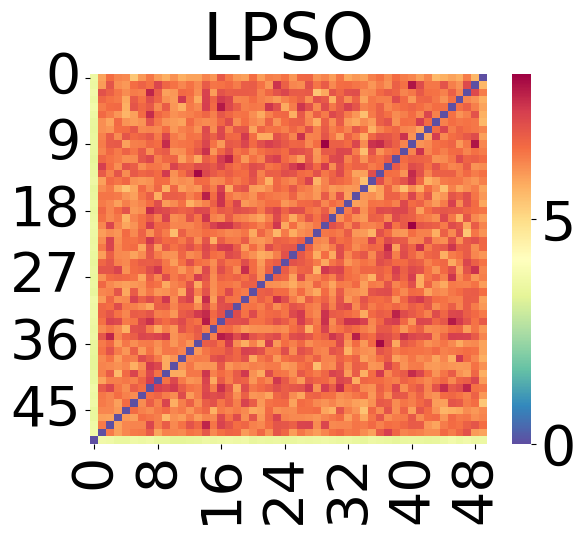

12.453416447529168


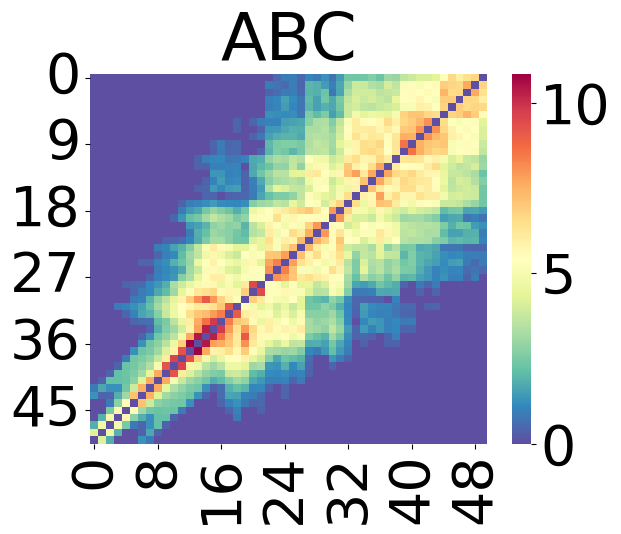

8.829686438790887


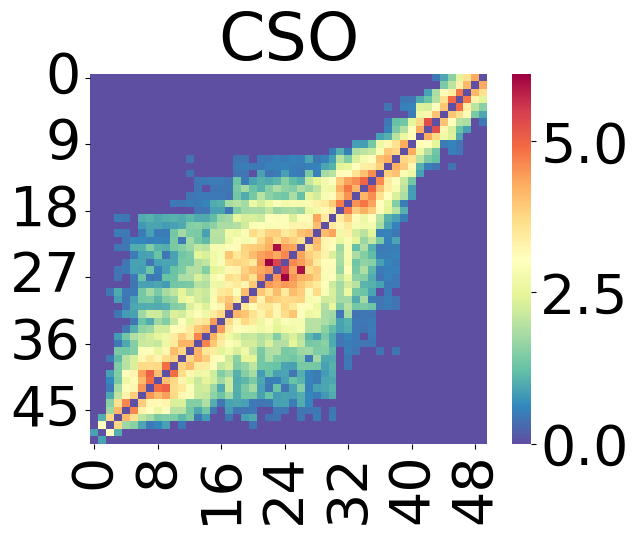

11.709880620007342


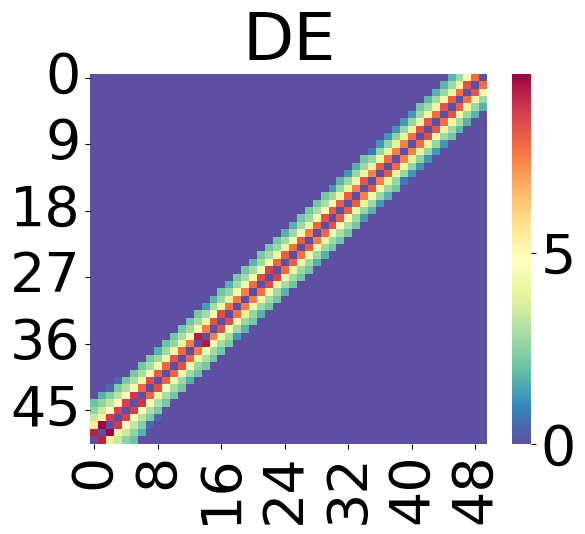

19.996217633996135


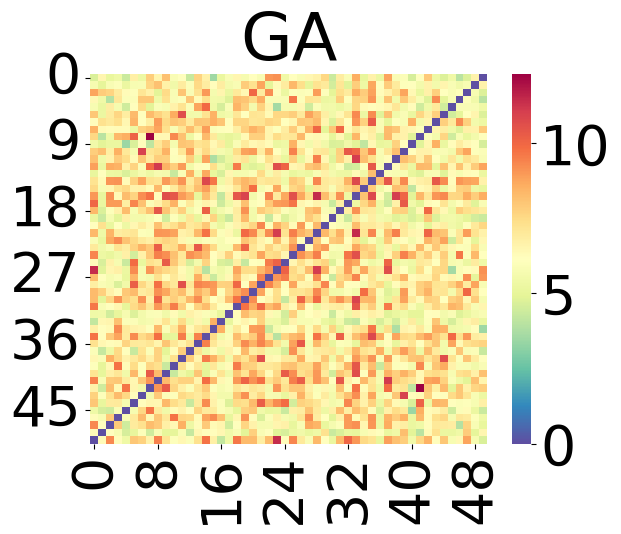

11.589137748505431


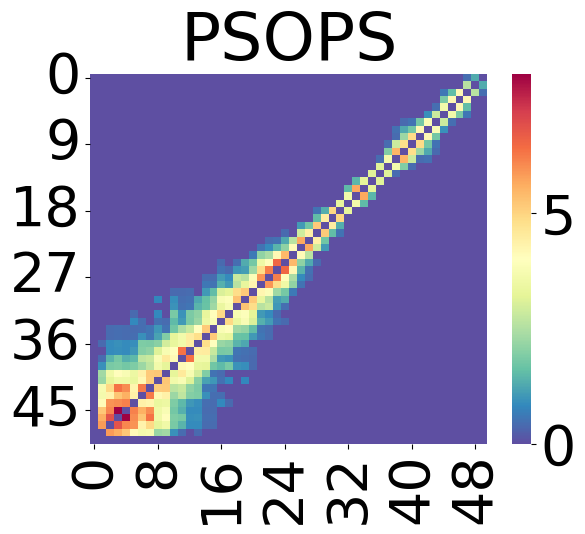

15.64065975989576


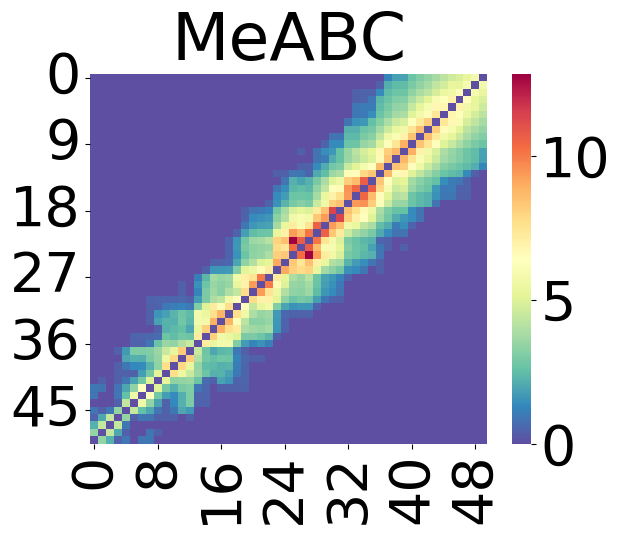

In [15]:
graphs_alg = {}
num_tws = num_iter//tw_size
for a in algorithms:
    exs_g = []
    mat_pds = alg_dataframe_pd[(alg_dataframe_pd.Algorithm1 ==a) & (alg_dataframe_pd.Algorithm2 ==a)]['PD'].values
    mat_pds = np.array([1/x if 0.05 < x <= .5 else 0 for x in mat_pds] )
    print(max(mat_pds))
    for ex in range(num_executions):
        exs_g.append(nx.from_numpy_matrix(np.reshape(mat_pds.reshape(num_executions, num_tws*num_tws)[ex], (num_tws, num_tws))))
        
    sns.heatmap(np.reshape(mat_pds.reshape(num_executions, 2500).mean(axis=0), (50, 50)), cmap=plt.cm.Spectral_r)
    plt.title(a)
    plt.show()
    graphs_alg[a] = exs_g

<div class="alert alert-block alert-success" style="font-size: 16px"> Creating PD comparison dataframe</div>

In [16]:
res_df = []
for a1, net1 in tqdm(graphs_alg.items(), leave=False):
    for a2, net2 in graphs_alg.items():
        for ex in range(num_executions):
            if a1 != a2:
                w_djs, w_bg, w_bh = portrait_divergence_weighted(net1[ex], net2[ex])              
                res_df.append([a1, a2, w_djs])
res_df = pd.DataFrame(res_df, columns=['Algorithm1', 'Algorithm2', 'PD'])    
res_df.head()

  0%|          | 0/8 [00:00<?, ?it/s]

Algorithm1 Algorithm2        PD
0       GPSO       LPSO  0.522373
1       GPSO       LPSO  0.495678
2       GPSO       LPSO  0.628027
3       GPSO       LPSO  0.740281
4       GPSO       LPSO  0.392414

<div class="alert alert-block alert-success" style="font-size: 16px"> Similarity comparison using boxplots</div>

  0%|          | 0/8 [00:00<?, ?it/s]

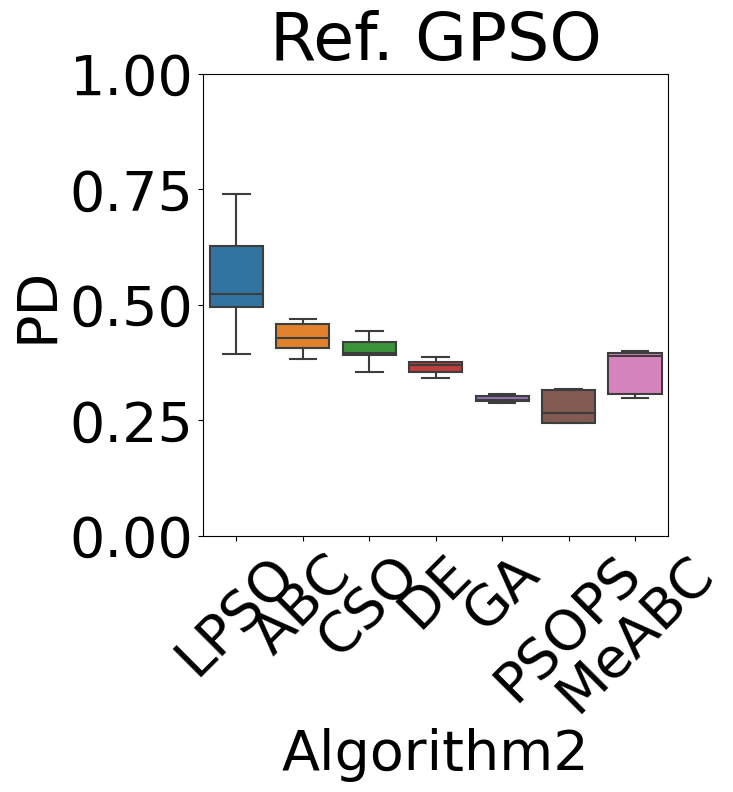

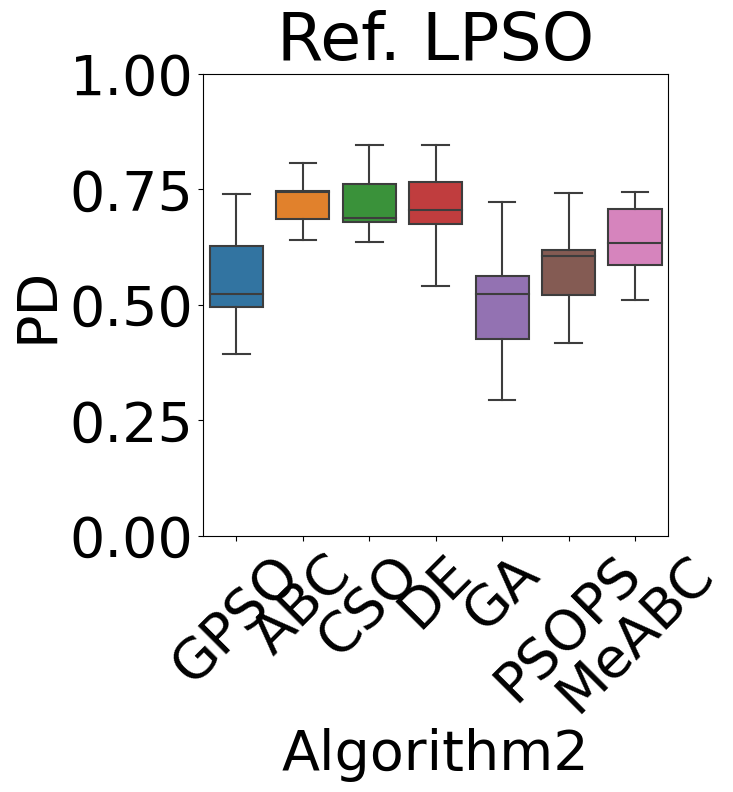

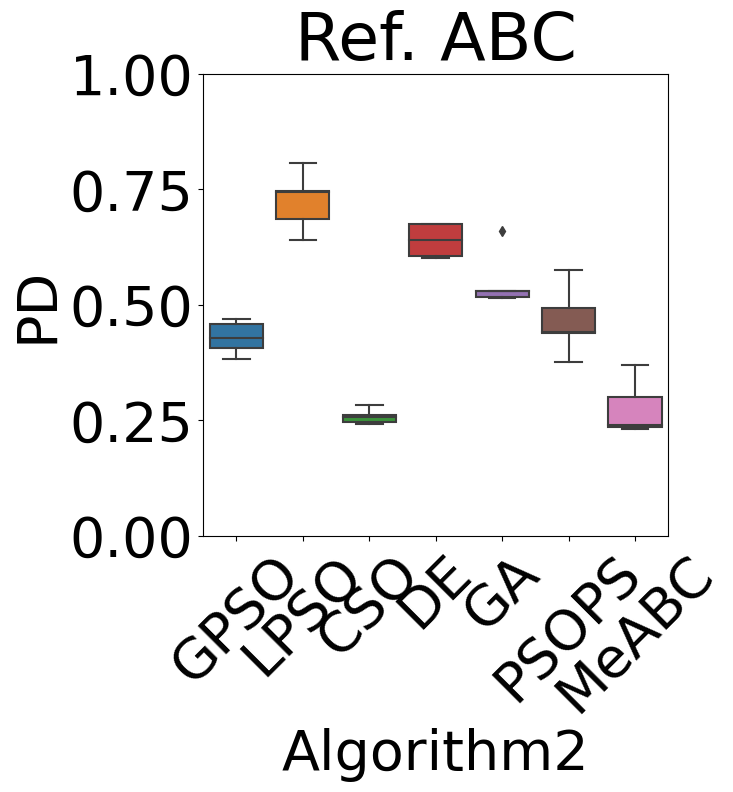

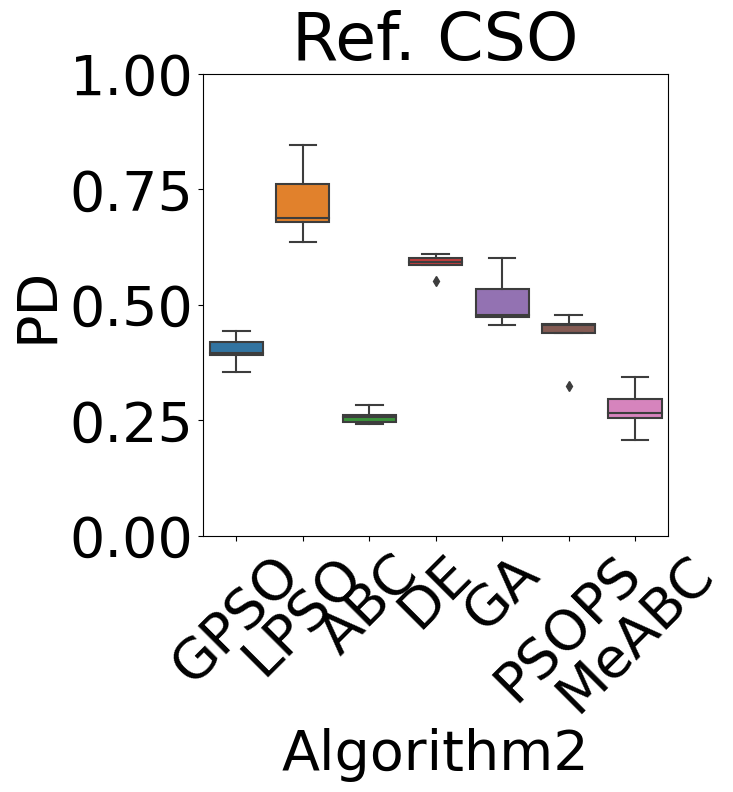

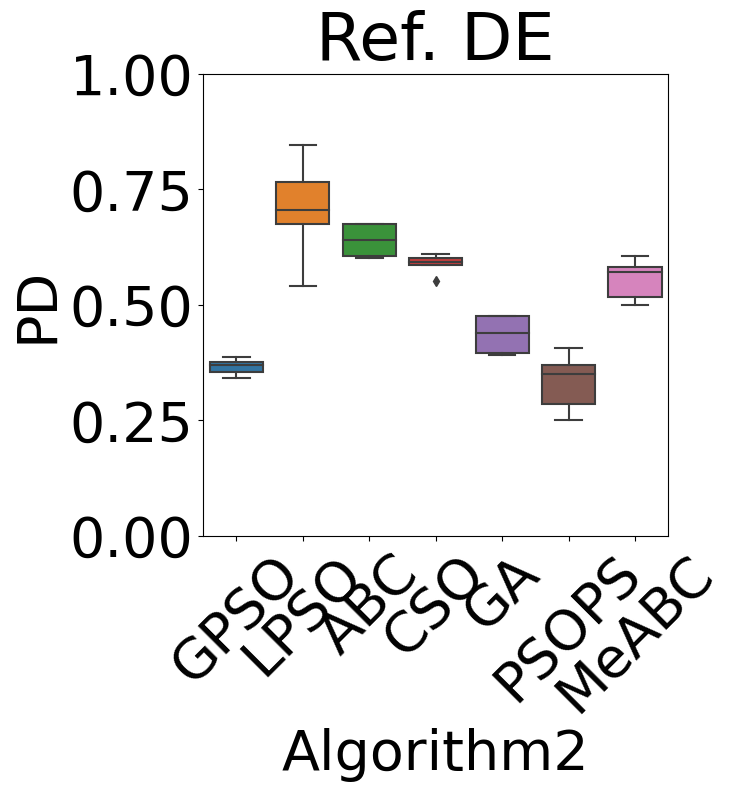

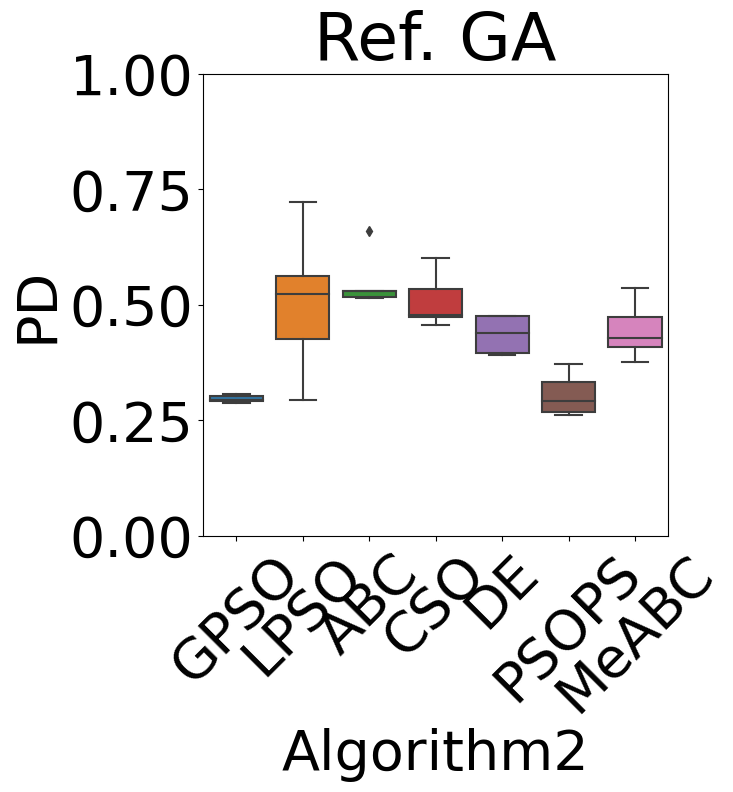

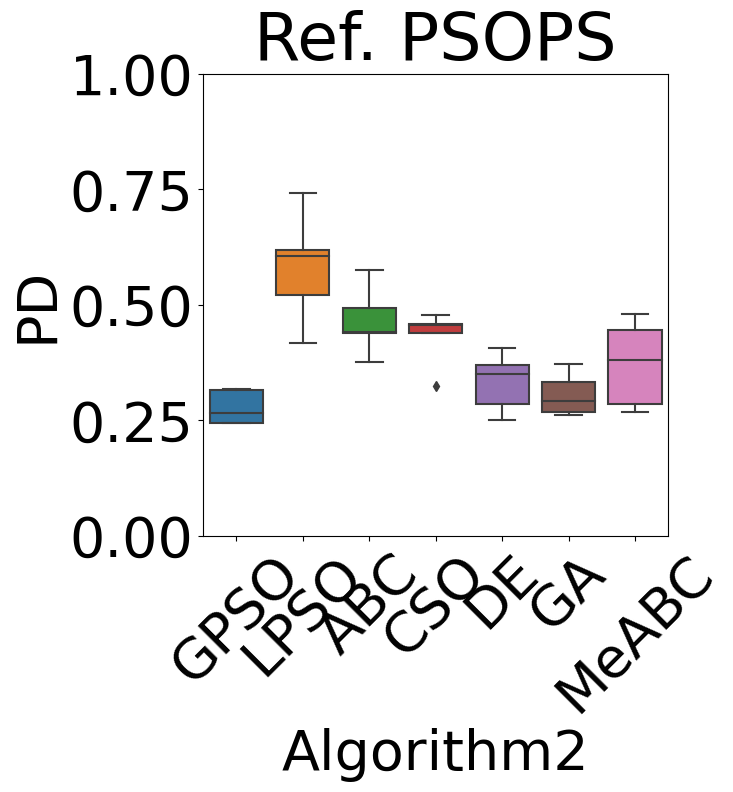

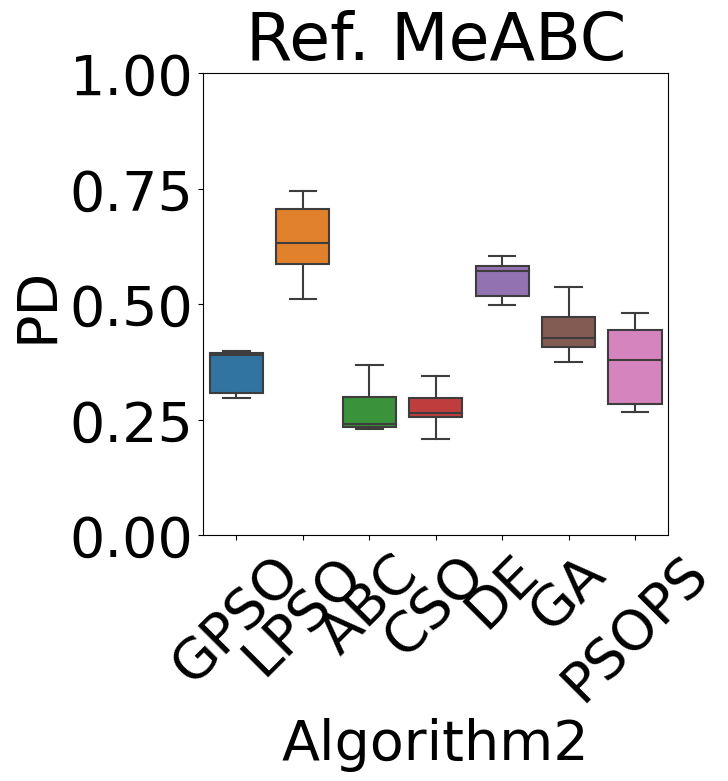

In [17]:
for a in tqdm(algorithms, leave=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.boxplot(x="Algorithm2", y="PD", data=res_df[res_df.Algorithm1 == a])
    plt.xticks(rotation=45)
    plt.ylim([0, 1])
    plt.title(f"Ref. {a}")
    plt.show()

<div class="alert alert-block alert-success" style="font-size: 16px"> Preparing the data to analise the distributions </div>

In [18]:
alg_dataframe_pd = pd.DataFrame(columns=['Algorithm', 'PD'])
for a in tqdm(algorithms, leave=False):
    data_alg = pd.read_csv(processed_results_dir+'/{}_{}_pd_difference_results_tw.txt'.format(a, a), header=None)
    data_ = [[a, pd_val] for pd_val in data_alg[0].values]
    temp_df = pd.DataFrame(data_, columns=['Algorithm', 'PD'])
    alg_dataframe_pd = pd.concat([alg_dataframe_pd, temp_df])
alg_dataframe_pd.head()

  0%|          | 0/8 [00:00<?, ?it/s]

Algorithm        PD
0      GPSO  0.907672
1      GPSO  0.884434
2      GPSO  0.893203
3      GPSO  0.826935
4      GPSO  0.845383

<div class="alert alert-block alert-success" style="font-size: 16px"> Visualising the OCDF distributions</div>

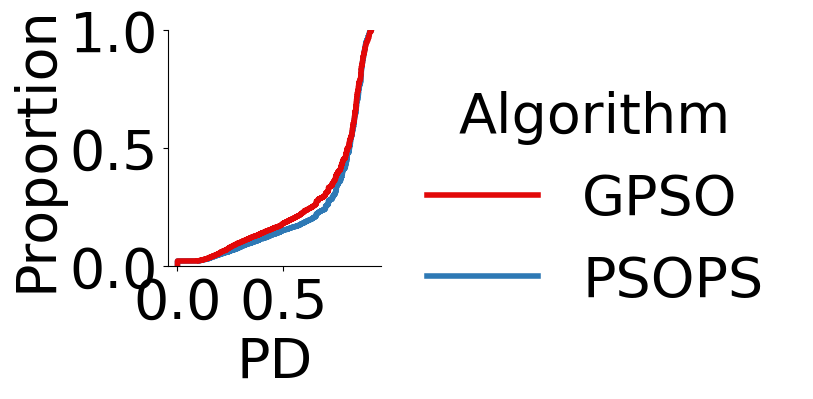

In [19]:
colors = ['#E20809', '#2E79B5']
sns.displot(alg_dataframe_pd[alg_dataframe_pd.Algorithm.isin(['GPSO', 'PSOPS'])], x='PD', 
            kind='ecdf', hue='Algorithm', aspect=1., linewidth=4, palette=colors)
plt.show()

<div class="alert alert-block alert-success" style="font-size: 16px">Comparing the generated networks using the PD metric</div>

In [20]:
res_df = pd.DataFrame()
for a1, net1 in graphs_alg.items():
    for a2, net2 in graphs_alg.items():
        res_g = []
        for ex in range(num_executions):
            w_djs, w_bg, w_bh = portrait_divergence_weighted(net1[ex], net2[ex])  
            res_g.append(w_djs)
        if a1 != a2:
            res_df["{} vs {}: ".format(a1, a2)] = res_g
        print("{} vs {}: ".format(a1, a2), np.mean(w_djs))
    print()
res_df.head()

GPSO vs GPSO:  0.0
GPSO vs LPSO:  0.39241350239149086
GPSO vs ABC:  0.4690943473928659
GPSO vs CSO:  0.3922419437037578
GPSO vs DE:  0.3861148084753786
GPSO vs GA:  0.28791930185494663
GPSO vs PSOPS:  0.31708813946138525
GPSO vs MeABC:  0.3898251833480076

LPSO vs GPSO:  0.39241350239149086
LPSO vs LPSO:  0.0
LPSO vs ABC:  0.7460690500983828
LPSO vs CSO:  0.635008060836233
LPSO vs DE:  0.5400787805978752
LPSO vs GA:  0.29416646372161515
LPSO vs PSOPS:  0.4169348453355652
LPSO vs MeABC:  0.5869278461925485

ABC vs GPSO:  0.4690943473928659
ABC vs LPSO:  0.7460690500983828
ABC vs ABC:  0.0
ABC vs CSO:  0.24204164767082045
ABC vs DE:  0.6744401455339364
ABC vs GA:  0.5165472051226161
ABC vs PSOPS:  0.5753875568080302
ABC vs MeABC:  0.23101357415402624

CSO vs GPSO:  0.3922419437037578
CSO vs LPSO:  0.635008060836233
CSO vs ABC:  0.24204164767082045
CSO vs CSO:  0.0
CSO vs DE:  0.5863423063855924
CSO vs GA:  0.456159621997223
CSO vs PSOPS:  0.4786646861946565
CSO vs MeABC:  0.2081054530002

GPSO vs LPSO:   GPSO vs ABC:   GPSO vs CSO:   GPSO vs DE:   GPSO vs GA:   \
0        0.522373       0.428408       0.396479      0.353907      0.294693   
1        0.495678       0.383663       0.354070      0.370330      0.291256   
2        0.628027       0.405796       0.443006      0.342237      0.303417   
3        0.740281       0.457788       0.419597      0.376741      0.306717   
4        0.392414       0.469094       0.392242      0.386115      0.287919   

   GPSO vs PSOPS:   GPSO vs MeABC:   LPSO vs GPSO:   LPSO vs ABC:   \
0         0.243788         0.297230        0.522373       0.639254   
1         0.315441         0.395194        0.495678       0.743452   
2         0.243832         0.399107        0.628027       0.684759   
3         0.265129         0.307195        0.740281       0.807527   
4         0.317088         0.389825        0.392414       0.746069   

   LPSO vs CSO:   ...  PSOPS vs DE:   PSOPS vs GA:   PSOPS vs MeABC:   \
0       0.686828  ...       0.406633       0.290750          0.267891   
1       0.679761  ...       0.284758       0.371933          0.480677   
2       0.762286  ...       0.350080       0.261344          0.380672   
3       0.845061  ...       0.370314       0.267642          0.284791   
4       0.635008  ...       0.250474       0.332082          0.445451   

   MeABC vs GPSO:   MeABC vs LPSO:   MeABC vs ABC:   MeABC vs CSO:   \
0         0.297230         0.510976        0.300579        0.296757   
1         0.395194         0.707216        0.240017        0.264857   
2         0.399107         0.633474        0.235154        0.255320   
3         0.307195         0.744860        0.368989        0.343984   
4         0.389825         0.586928        0.231014        0.208105   

   MeABC vs DE:   MeABC vs GA:   MeABC vs PSOPS:   
0       0.517174       0.376326          0.267891  
1       0.605225       0.536616          0.480677  
2       0.582676       0.473698          0.380672  
3       0.498590       0.408121          0.284791  
4       0.571771       0.427759          0.445451  

[5 rows x 56 columns]

<div class="alert alert-block alert-success" style="font-size: 16px"> PD heatmaps: Mean and STD values</div>

TypeError: unsupported operand type(s) for /: 'str' and 'int'

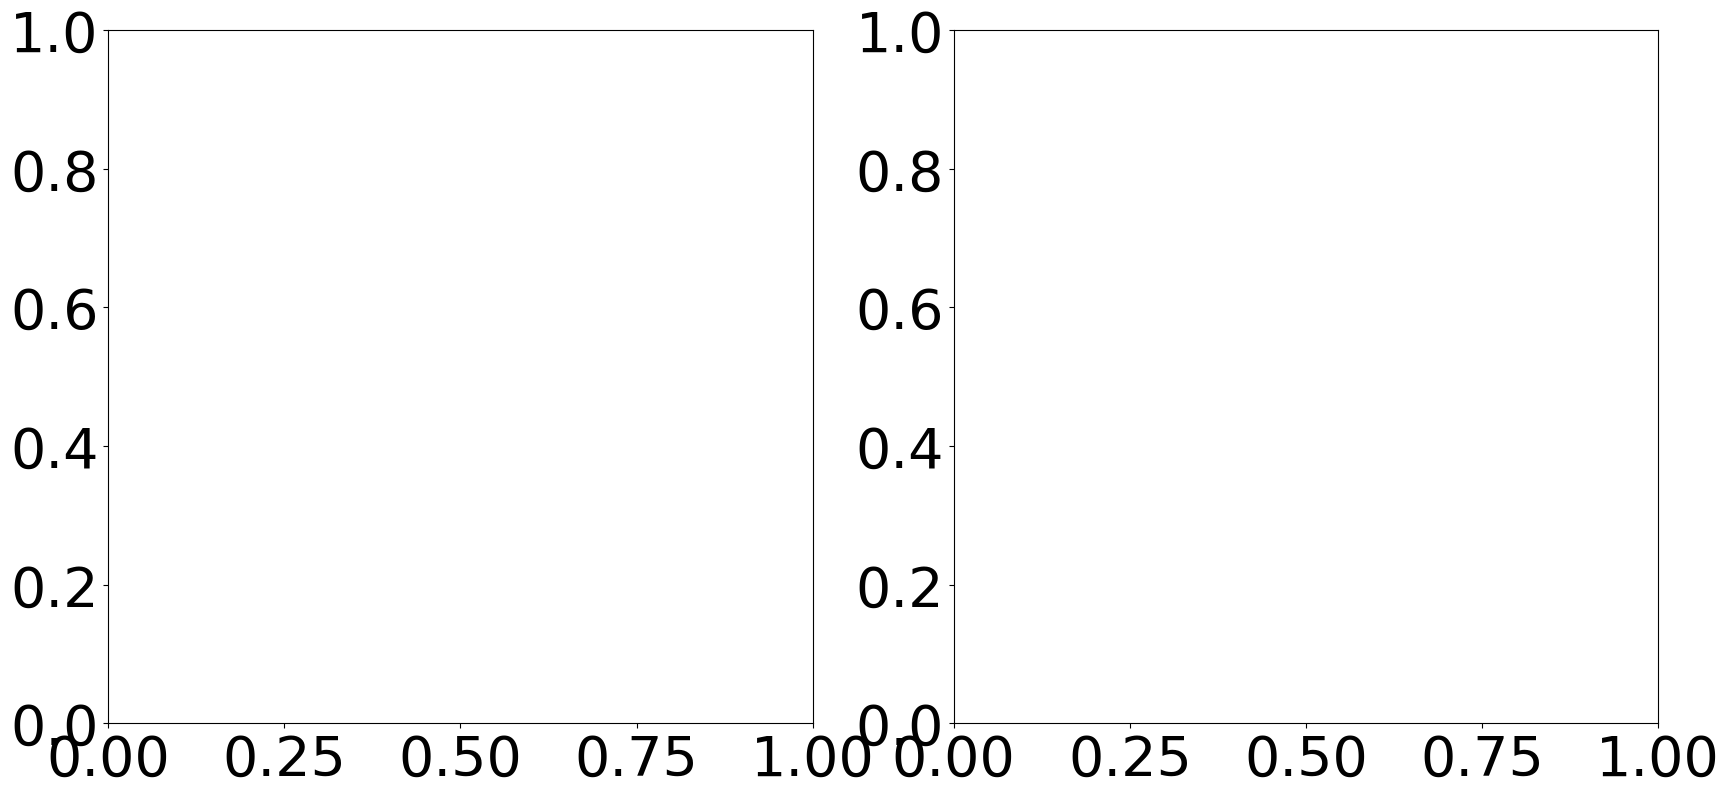

In [21]:
test_algo_df = pd.DataFrame()
num_tws = num_iter//tw_size
for a in alg_dataframe_pd.columns:
    line = []
    for e in range(0, num_tws*num_tws*num_executions, num_tws*num_tws):
        line.append(alg_dataframe_pd[a][e:e+(num_tws*num_tws)].values)
    fig, axs = plt.subplots(ncols=2, figsize=(20, 9))
    mean_d = np.mean(line, axis=0)
    std_d = np.std(line, axis=0)
    sns.heatmap(np.reshape(mean_d, (num_tws, num_tws)), ax=axs[0], vmin=0, vmax=1, cmap=plt.cm.Spectral_r)
    sns.heatmap(np.reshape(std_d, (num_tws, num_tws)), ax=axs[1], vmin=0, vmax=0.3, cmap=plt.cm.RdBu_r)
    print('Max STD ', max(std_d))
    plt.show()